In [1]:
# %matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io as sio
import io
import gsw
import seaborn as sns

from scipy import integrate
from matplotlib import cm

# 1. Along-stream plots

FG method, un-sorted density profile, u&v&sig4 filtered with a 20-m 4th order butterworth window, real world diffusivity

In [2]:
mdirec='/Users/tantanmeow/Desktop/WORK/2018-2019/Jesse/sp-tg/'

In [3]:
data_2014 = sio.loadmat(mdirec[:-7]+'/proc_data/'+'TY_P5_02_2014.mat',squeeze_me = True,struct_as_record = False)
data_2012 = sio.loadmat(mdirec[:-7]+'/proc_data/'+'TY_P5_00_2012.mat',squeeze_me = True,struct_as_record = False)

In [4]:
dict.keys(data_2012)

dict_keys(['__header__', '__version__', '__globals__', 't2', 'c1', 'c2', 's2', 'theta1', 'theta2', 'sigma1', 'sigma2', 'oxygen', 'trans', 'fl', 'lon', 'lat', 'nscan', 'depth', 'datenum', 'u', 'v', 'u_bt', 'v_bt', 'mlon', 'mlat', 'z', 'time', 'year', 'sill', 'name', 'longname', 'np', 'T', 'P', 'S', 'spd', 'SA', 'CT', 'sig4', 'g', 'b', 'sig4m', 'sig4_sorted', 'b_sorted', 'N2', 'P_mid', 'z_mid', 'dist', 'dist_r', 'zone_number', 'zone_letter', 'distdata', 'xdata', 'ydata', 'xm', 'ym', 'bdepth', 'uo', 'vo', 'UT', 'VT', 'zo', 'dsig4', 'HKE', 'PT0', 'gamman', 'gamman_sorted', 'gammanm', 'N2_sorted', 'N2_smoothed', 'eps', 'N2_overturn', 'LT', 'Lo', 'LT_counter', 'Lo_counter', 'eps_zint', 'epso'])

In [5]:
GM_towyo_2012 = sio.loadmat(mdirec+'codes_mf_1over10/'+'TG_SI_TY_P5_00_2012_ex2.mat',squeeze_me = True,struct_as_record = False)

# GM_towyo_2014 = sio.loadmat(mdirec+'codes_theta/'+'TG_SI_TY_P5_02_2014_ex2.mat',squeeze_me = True,struct_as_record = False)


In [6]:
dict.keys(GM_towyo_2012)

dict_keys(['__header__', '__version__', '__globals__', 'BF', 'BFm', 'Bm', 'CI', 'CL', 'CR', 'EFn', 'EFnm', 'END', 'ERR_K', 'GR', 'K', 'Knet', 'Knetm', 'Kt', 'L', 'LAT', 'LH', 'LHm', 'LON', 'N2', 'N2m', 'NOS', 'Phi', 'Phim', 'RH', 'RHm', 'Ri', 'Rim', 'SP', 'SPm', 'Vm', 'Vz', 'Vzm', 'Vzzm', 'botz', 'cEFn', 'cEFnm', 'eps', 'epsm', 'zw'])

## 1). along-stream observation

In [7]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(18, 18),sharex=True)
ax[0].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
sc0 = ax[0].contourf(data_2012['lat'], data_2012['z'],
                    data_2012['sig4']-1000, levels=40)
fig.colorbar(sc0, label="$\sigma_4$", ax=ax[0])
ax[0].set_ylim([-5200, -4000])
ax[0].set_yticks(np.arange(-5200, -4000+1e-4, 200))
for i in range(len(GM_towyo_2012['LAT'])):
    ax[0].plot([GM_towyo_2012['LAT'][i], GM_towyo_2012['LAT'][i]],
               [-5200, -4000], color='k')
for i in range(round(len(GM_towyo_2012['LAT'])/4)):
    ax[0].text(GM_towyo_2012['LAT'][4*i+1], -4000,
               str(4*i+1), fontsize=8, color='k')

ax[1].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
sc1 = ax[1].pcolor(data_2012['lat'], data_2012['z'], data_2012['v'],
           cmap=cm.RdBu_r, vmin=-.5, vmax=.5)
fig.colorbar(sc1, label="v", ax=ax[1])
ax[1].set_ylim([-5200, -4000])
ax[1].set_yticks(np.arange(-5200, -4000+1e-4, 200))
for i in range(len(GM_towyo_2012['LAT'])):
    ax[1].plot([GM_towyo_2012['LAT'][i], GM_towyo_2012['LAT'][i]],
               [-5200, -4000], color='k')
for i in range(round(len(GM_towyo_2012['LAT'])/4)):
    ax[1].text(GM_towyo_2012['LAT'][4*i+1], -4000,
               str(4*i+1), fontsize=8, color='k')
    
ax[2].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
sc2 = ax[2].pcolor(data_2012['lat'], data_2012['z'], data_2012['LT'])
fig.colorbar(sc2, label="L_T", ax=ax[2])
ax[2].set_ylim([-5200, -4000])
ax[2].set_yticks(np.arange(-5200, -4000+1e-4, 200))
for i in range(len(GM_towyo_2012['LAT'])):
    ax[2].plot([GM_towyo_2012['LAT'][i], GM_towyo_2012['LAT'][i]],
               [-5200, -4000], color='k')
for i in range(round(len(GM_towyo_2012['LAT'])/4)):
    ax[2].text(GM_towyo_2012['LAT'][4*i+1], -4000,
               str(4*i+1), fontsize=8, color='k')
    
ax[3].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
sc3 = ax[3].pcolor(data_2012['lat'], data_2012['z'], np.log10(data_2012['eps']))
fig.colorbar(sc3, label="$\epsilon$", ax=ax[3])
ax[3].set_ylim([-5200, -4000])
ax[3].set_yticks(np.arange(-5200, -4000+1e-4, 200))
for i in range(len(GM_towyo_2012['LAT'])):
    ax[3].plot([GM_towyo_2012['LAT'][i], GM_towyo_2012['LAT'][i]],
               [-5200, -4000], color='k')
for i in range(round(len(GM_towyo_2012['LAT'])/4)):
    ax[3].text(GM_towyo_2012['LAT'][4*i+1], -4000,
               str(4*i+1), fontsize=8, color='k')
    
ax[-1].plot(GM_towyo_2012['LAT'], np.sqrt(-np.nanmin(GM_towyo_2012['N2m'],axis=0))*3600)
fig.colorbar(sc3, label="$\sigma$ (hr$^{-1}$)", ax=ax[-1])
plt.tight_layout()

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10


In [8]:
# fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(18, 18),sharex=True)
# ax[0].fill_between(data_2014['mlat'], -data_2014['bdepth'],
#                    np.ones(data_2014['bdepth'].size)*-5200, color='0.5')
# sc0 = ax[0].contourf(data_2014['lat'], data_2014['z'],
#                     data_2014['sig4']-1000, levels=40)
# fig.colorbar(sc0, label="$\sigma_4$", ax=ax[0])
# ax[0].set_ylim([-5200, -4000])
# ax[0].set_yticks(np.arange(-5200, -4000+1e-4, 200))
# for i in range(len(GM_towyo_2014['LAT'])):
#     ax[0].plot([GM_towyo_2014['LAT'][i], GM_towyo_2014['LAT'][i]],
#                [-5200, -4000], color='k')
# for i in range(round(len(GM_towyo_2014['LAT'])/4)):
#     ax[0].text(GM_towyo_2014['LAT'][4*i+1], -4000,
#                str(4*i+1), fontsize=8, color='k')

# ax[1].fill_between(data_2014['mlat'], -data_2014['bdepth'],
#                    np.ones(data_2014['bdepth'].size)*-5200, color='0.5')
# sc1 = ax[1].pcolor(data_2014['lat'], data_2014['z'], data_2014['v'],
#            cmap=cm.RdBu_r, vmin=-.5, vmax=.5)
# fig.colorbar(sc1, label="v", ax=ax[1])
# ax[1].set_ylim([-5200, -4000])
# ax[1].set_yticks(np.arange(-5200, -4000+1e-4, 200))
# for i in range(len(GM_towyo_2014['LAT'])):
#     ax[1].plot([GM_towyo_2014['LAT'][i], GM_towyo_2014['LAT'][i]],
#                [-5200, -4000], color='k')
# for i in range(round(len(GM_towyo_2014['LAT'])/4)):
#     ax[1].text(GM_towyo_2014['LAT'][4*i+1], -4000,
#                str(4*i+1), fontsize=8, color='k')
    
# ax[2].fill_between(data_2014['mlat'], -data_2014['bdepth'],
#                    np.ones(data_2014['bdepth'].size)*-5200, color='0.5')
# sc2 = ax[2].pcolor(data_2014['lat'], data_2014['z'], data_2014['LT'])
# fig.colorbar(sc2, label="L_T", ax=ax[2])
# ax[2].set_ylim([-5200, -4000])
# ax[2].set_yticks(np.arange(-5200, -4000+1e-4, 200))
# for i in range(len(GM_towyo_2014['LAT'])):
#     ax[2].plot([GM_towyo_2014['LAT'][i], GM_towyo_2014['LAT'][i]],
#                [-5200, -4000], color='k')
# for i in range(round(len(GM_towyo_2014['LAT'])/4)):
#     ax[2].text(GM_towyo_2014['LAT'][4*i+1], -4000,
#                str(4*i+1), fontsize=8, color='k')
    
# ax[-1].fill_between(data_2014['mlat'], -data_2014['bdepth'],
#                    np.ones(data_2014['bdepth'].size)*-5200, color='0.5')
# sc3 = ax[-1].pcolor(data_2014['lat'], data_2014['z'], np.log10(data_2014['eps']))
# fig.colorbar(sc3, label="$\epsilon$", ax=ax[-1])
# ax[-1].set_ylim([-5200, -4000])
# ax[-1].set_yticks(np.arange(-5200, -4000+1e-4, 200))
# for i in range(len(GM_towyo_2014['LAT'])):
#     ax[-1].plot([GM_towyo_2014['LAT'][i], GM_towyo_2014['LAT'][i]],
#                [-5200, -4000], color='k')
# for i in range(round(len(GM_towyo_2014['LAT'])/4)):
#     ax[-1].text(GM_towyo_2014['LAT'][4*i+1], -4000,
#                str(4*i+1), fontsize=8, color='k')

## 2) Thorpe scale & \epsilon vs Ri<1/4 and N2<0

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'label'
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The following kwargs were not used by contour: 'label'
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/py

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_laun

[Text(0, 0, '5200'),
 Text(0, 0, '5000'),
 Text(0, 0, '4800'),
 Text(0, 0, '4600'),
 Text(0, 0, '4400'),
 Text(0, 0, '4200'),
 Text(0, 0, '4000')]

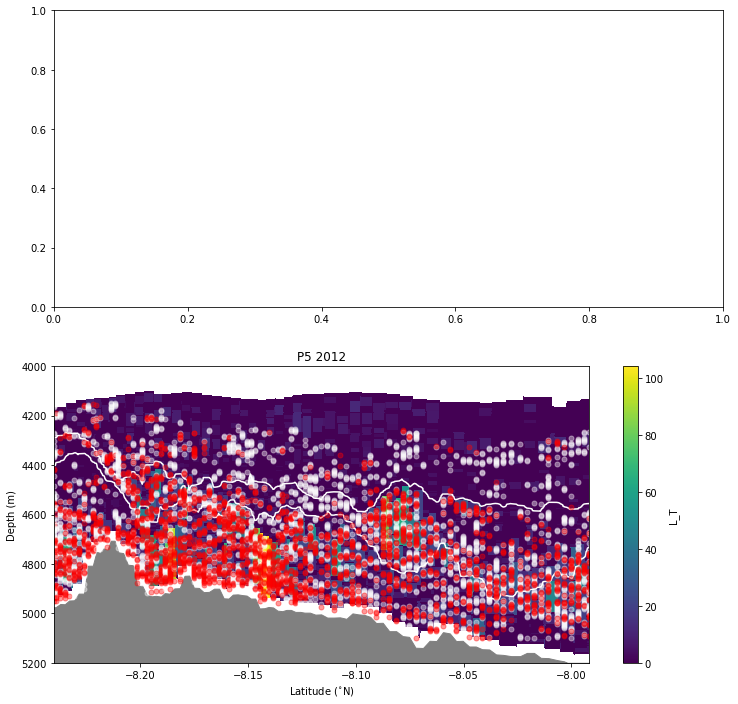

In [9]:
# critical level, GR along path
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
# # ax[0].scatter(data_2014['lat'],data_2014['z'],c=data_2014['eps']) #c=np.log10(data_ex2['eps']))
# # ax[0].plot(data_2014['mlat'], -data_2014['bdepth'], 'r-', label='sea bottom')
# ax[0].fill_between(data_2014['mlat'], -data_2014['bdepth'],
#                    np.ones(data_2014['bdepth'].size)*-5200, color='0.5')
# ax[0].contour(data_2014['lat'], data_2014['z'], data_2014['sig4_sorted'], [
#               1045.93], colors='w', label='$\sigma_4=45.93 kgm^{-3}$')
# ax[0].contour(data_2014['lat'], data_2014['z'], data_2014['sig4_sorted'], [
#               1045.96], colors='w', label='$\sigma_4=45.93 kgm^{-3}$')
# for i in range(len(GM_towyo_2014['LAT'])):
#     mask_shear = (GM_towyo_2014['Rim'][:, i] >0) & (GM_towyo_2014['Rim'][:, i] < 1/4)
#     ax[0].plot(np.ones((len(GM_towyo_2014['zw'][mask_shear]))) *
#                GM_towyo_2014['LAT'][i], GM_towyo_2014['zw'][mask_shear], 'w.', ms=10, alpha=.4)
#     mask_convec = GM_towyo_2014['Rim'][:, i] <0
#     ax[0].plot(np.ones((len(GM_towyo_2014['zw'][mask_convec]))) *
#                GM_towyo_2014['LAT'][i], GM_towyo_2014['zw'][mask_convec], 'r.', ms=10, alpha=.4)
# sc0 = ax[0].pcolor(data_2014['lat'], data_2014['z'], data_2014['LT'])
# fig.colorbar(sc0, label="L_T", ax=ax[0])
# # ax[0].legend()
# ax[0].set_xlabel('Latitude ($^{\circ}$N)')
# ax[0].set_ylabel('Depth (m)')
# ax[0].set_title('P5 2014')
# ax[0].set_ylim([-5200, -4000])
# ax[0].set_yticks(np.arange(-5200, -4000+1e-4, 200))
# ax[0].set_yticklabels(np.arange(5200, 4000-1e-4, -200, dtype=int))

# ax[1].scatter(data_2012['lat'],data_2012['z'],c=data_2012['eps']) #c=np.log10(data_ex2['eps']))
# ax[1].plot(data_2012['mlat'], -data_2012['bdepth'], 'r-', label='sea bottom')
ax[1].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
ax[1].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.93], colors='w', label='$\sigma_4=45.93 kgm^{-3}$')
ax[1].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.96], colors='w', label='$\sigma_4=45.93 kgm^{-3}$')
for i in range(len(GM_towyo_2012['LAT'])):
    mask_shear = (GM_towyo_2012['Rim'][:, i] >0) & (GM_towyo_2012['Rim'][:, i]< 1/4)
    ax[1].plot(np.ones((len(GM_towyo_2012['zw'][mask_shear]))) *
               GM_towyo_2012['LAT'][i], GM_towyo_2012['zw'][mask_shear], 'w.', ms=10, alpha=.4)
    mask_convec = GM_towyo_2012['Rim'][:, i] <0
    ax[1].plot(np.ones((len(GM_towyo_2012['zw'][mask_convec]))) *
               GM_towyo_2012['LAT'][i], GM_towyo_2012['zw'][mask_convec], 'r.', ms=10, alpha=.4)
sc1 = ax[1].pcolor(data_2012['lat'], data_2012['z'], data_2012['LT'])
fig.colorbar(sc1, label="L_T", ax=ax[1])
ax[1].set_xlabel('Latitude ($^{\circ}$N)')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('P5 2012')
ax[1].set_ylim([-5200, -4000])
ax[1].set_yticks(np.arange(-5200, -4000+1e-4, 200))
ax[1].set_yticklabels(np.arange(5200, 4000-1e-4, -200, dtype=int))

# plt.savefig(mdirec+ 'results/' + 'growthrate_alongP5.png', dpi=400)

In [10]:
# critical level, GR along path
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
# # ax[0].scatter(data_2014['lat'],data_2014['z'],c=data_2014['eps']) #c=np.log10(data_ex2['eps']))
# # ax[0].plot(data_2014['mlat'], -data_2014['bdepth'], 'r-', label='sea bottom')
# ax[0].fill_between(data_2014['mlat'], -data_2014['bdepth'],
#                    np.ones(data_2014['bdepth'].size)*-5200, color='0.5')
# ax[0].contour(data_2014['lat'], data_2014['z'], data_2014['sig4_sorted'], [
#               1045.93], colors='k', label='$\sigma_4=45.93 kgm^{-3}$')
# ax[0].contour(data_2014['lat'], data_2014['z'], data_2014['sig4_sorted'], [
#               1045.96], colors='k', label='$\sigma_4=45.93 kgm^{-3}$')
# for i in range(len(GM_towyo_2014['LAT'])):
#     mask_shear = (GM_towyo_2014['Rim'][:, i] >0) & (GM_towyo_2014['Rim'][:, i] < 1/4)
#     ax[0].plot(np.ones((len(GM_towyo_2014['zw'][mask_shear]))) *
#                GM_towyo_2014['LAT'][i], GM_towyo_2014['zw'][mask_shear], 'k.', ms=10, alpha=.4)
#     mask_convec = GM_towyo_2014['Rim'][:, i] <0
#     ax[0].plot(np.ones((len(GM_towyo_2014['zw'][mask_convec]))) *
#                GM_towyo_2014['LAT'][i], GM_towyo_2014['zw'][mask_convec], 'r.', ms=10, alpha=.4)
# sc0 = ax[0].pcolor(data_2014['lat'], data_2014['z'], np.log10(data_2014['eps']))
# fig.colorbar(sc0, label="L_T", ax=ax[0])
# # ax[0].legend()
# ax[0].set_xlabel('Latitude ($^{\circ}$N)')
# ax[0].set_ylabel('Depth (m)')
# ax[0].set_title('P5 2014')
# ax[0].set_ylim([-5200, -4000])
# ax[0].set_yticks(np.arange(-5200, -4000+1e-4, 200))
# ax[0].set_yticklabels(np.arange(5200, 4000-1e-4, -200, dtype=int))

# ax[1].scatter(data_2012['lat'],data_2012['z'],c=data_2012['eps']) #c=np.log10(data_ex2['eps']))
# ax[1].plot(data_2012['mlat'], -data_2012['bdepth'], 'r-', label='sea bottom')
ax[1].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
ax[1].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.93], colors='k', label='$\sigma_4=45.93 kgm^{-3}$')
ax[1].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.96], colors='k', label='$\sigma_4=45.93 kgm^{-3}$')
for i in range(len(GM_towyo_2012['LAT'])):
    mask_shear = (GM_towyo_2012['Rim'][:, i] >0) & (GM_towyo_2012['Rim'][:, i]< 1/4)
    ax[1].plot(np.ones((len(GM_towyo_2012['zw'][mask_shear]))) *
               GM_towyo_2012['LAT'][i], GM_towyo_2012['zw'][mask_shear], 'k.', ms=10, alpha=.4)
    mask_convec = GM_towyo_2012['Rim'][:, i] <0
    ax[1].plot(np.ones((len(GM_towyo_2012['zw'][mask_convec]))) *
               GM_towyo_2012['LAT'][i], GM_towyo_2012['zw'][mask_convec], 'r.', ms=10, alpha=.4)
sc1 = ax[1].pcolor(data_2012['lat'], data_2012['z'], np.log10(data_2012['eps']))
fig.colorbar(sc1, label="L_T", ax=ax[1])
ax[1].set_xlabel('Latitude ($^{\circ}$N)')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('P5 2012')
ax[1].set_ylim([-5200, -4000])
ax[1].set_yticks(np.arange(-5200, -4000+1e-4, 200))
ax[1].set_yticklabels(np.arange(5200, 4000-1e-4, -200, dtype=int))

# plt.savefig(mdirec+ 'results/' + 'growthrate_alongP5.png', dpi=400)

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'label'
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The following kwargs were not used by contour: 'label'
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/py

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_l

[Text(0, 0, '5200'),
 Text(0, 0, '5000'),
 Text(0, 0, '4800'),
 Text(0, 0, '4600'),
 Text(0, 0, '4400'),
 Text(0, 0, '4200'),
 Text(0, 0, '4000')]

## 3). along-stream growth rate

a) Perform quality control

In [11]:
dict.keys(data_2012)

dict_keys(['__header__', '__version__', '__globals__', 't2', 'c1', 'c2', 's2', 'theta1', 'theta2', 'sigma1', 'sigma2', 'oxygen', 'trans', 'fl', 'lon', 'lat', 'nscan', 'depth', 'datenum', 'u', 'v', 'u_bt', 'v_bt', 'mlon', 'mlat', 'z', 'time', 'year', 'sill', 'name', 'longname', 'np', 'T', 'P', 'S', 'spd', 'SA', 'CT', 'sig4', 'g', 'b', 'sig4m', 'sig4_sorted', 'b_sorted', 'N2', 'P_mid', 'z_mid', 'dist', 'dist_r', 'zone_number', 'zone_letter', 'distdata', 'xdata', 'ydata', 'xm', 'ym', 'bdepth', 'uo', 'vo', 'UT', 'VT', 'zo', 'dsig4', 'HKE', 'PT0', 'gamman', 'gamman_sorted', 'gammanm', 'N2_sorted', 'N2_smoothed', 'eps', 'N2_overturn', 'LT', 'Lo', 'LT_counter', 'Lo_counter', 'eps_zint', 'epso'])

In [12]:
dict.keys(GM_towyo_2012)

dict_keys(['__header__', '__version__', '__globals__', 'BF', 'BFm', 'Bm', 'CI', 'CL', 'CR', 'EFn', 'EFnm', 'END', 'ERR_K', 'GR', 'K', 'Knet', 'Knetm', 'Kt', 'L', 'LAT', 'LH', 'LHm', 'LON', 'N2', 'N2m', 'NOS', 'Phi', 'Phim', 'RH', 'RHm', 'Ri', 'Rim', 'SP', 'SPm', 'Vm', 'Vz', 'Vzm', 'Vzzm', 'botz', 'cEFn', 'cEFnm', 'eps', 'epsm', 'zw'])

In [13]:
GM_towyo_2012['NOS']

array([[10., nan],
       [10., nan],
       [10., nan],
       [10., nan],
       [16., nan],
       [10., nan],
       [10., nan],
       [11., nan],
       [10., nan],
       [10., nan],
       [10., nan],
       [12., nan],
       [10., nan],
       [10., nan],
       [10., nan],
       [11., nan],
       [15., nan],
       [12., nan],
       [18., nan],
       [18., nan],
       [17., nan],
       [17., nan],
       [10., nan],
       [18., nan],
       [10., nan],
       [11., nan],
       [15., nan],
       [10., nan],
       [12., nan],
       [17., nan],
       [10., nan],
       [11., nan],
       [15., nan],
       [15., nan],
       [10., nan],
       [10., nan],
       [10., nan],
       [18., nan],
       [15., nan],
       [13., nan],
       [10., nan],
       [17., nan],
       [10., nan],
       [16., nan],
       [10., nan],
       [10., nan],
       [10., nan],
       [10., nan],
       [10., nan],
       [10., nan],
       [10., nan],
       [10., nan],
       [10.,

In [14]:
def extract_data(GM_towyo, i, sig4, z):
    '''flatten out data and combine the results at all the section into a panda dataframe'''
    from scipy.interpolate import interp1d
    
    # growing mode info
    gr = GM_towyo['GR'][i, :, :].flatten()*3600
    cl = GM_towyo['CL'][i, :, :].flatten()
    cr = GM_towyo['CR'][i, :, :].flatten()
    k = GM_towyo['Kt'][i, :, :].flatten()
    l = GM_towyo['Phi'][i, :, :].flatten()
    
    cl_sig4 = np.zeros(cl.size) + np.nan
    f=interp1d(z[:,i], sig4[:,i], bounds_error=False, fill_value=np.nan)
    cl_sig4 = f(cl)
    cl_v = np.zeros(cl.size) + np.nan
    f=interp1d(GM_towyo['zw'], GM_towyo['Vm'][:,i], bounds_error=False, fill_value=np.nan)
    cl_v = f(cl)

    # energy budget
    sp = GM_towyo['SP'][i, :, :].flatten()
    bf = GM_towyo['BF'][i, :, :].flatten()
    rh = GM_towyo['RH'][i, :, :].flatten()
    lh = GM_towyo['LH'][i, :, :].flatten()
    spm = GM_towyo['SPm'][i, :, :].flatten()
    bfm = GM_towyo['BFm'][i, :, :].flatten()
    rhm = GM_towyo['RHm'][i, :, :].flatten()
    lhm = GM_towyo['LHm'][i, :, :].flatten()
    err = GM_towyo['ERR_K'][i, :, :].flatten()
    # flow info
    vz = GM_towyo['Vz'][i, :, :].flatten()
    n2 = GM_towyo['N2'][i, :, :].flatten()
    ri = GM_towyo['Ri'][i, :, :].flatten()
    lon = np.ones(gr.size) * GM_towyo['LON'][i]
    lat = np.ones(gr.size) * GM_towyo['LAT'][i]
    # other info
    # 1 - FGM is found at the ends of a mode family, Smyth (2013) rejected this type of mode family
    end = GM_towyo['END'][i, :, :].flatten()
    ze = np.ones(gr.size) * GM_towyo['zw'][np.where(~np.isnan(GM_towyo['Vm'][:,i]))[0][0]] #end
    zs = np.ones(gr.size) * GM_towyo['zw'][np.where(~np.isnan(GM_towyo['Vm'][:,i]))[0][-1]] #start

    # get rid of nans
    mask = ~np.isnan(gr)
    gr = gr[mask]
    cl = cl[mask]
    cl_sig4 = cl_sig4[mask]
    cl_v = cl_v[mask]
    cr = cr[mask]
    k = k[mask]
    l = l[mask]
    sp = sp[mask]
    bf = bf[mask]
    rh = rh[mask]
    lh = lh[mask]
    spm = spm[mask]
    bfm = bfm[mask]
    rhm = rhm[mask]
    lhm = lhm[mask]
    err = err[mask]
    vz = vz[mask]
    n2 = n2[mask]
    ri = ri[mask]
    end = end[mask]
    lon = lon[mask]
    lat = lat[mask]
    ze = ze[mask]
    zs = zs[mask]
    
    data = pd.DataFrame({'gr': gr, 'cl': cl, 'cl_sig4': cl_sig4, 'cl_v': cl_v, 'cr': cr, 'lam': 2*np.pi/k, 'phi': l, 
                 'sp': sp, 'bf': bf,'rh': rh, 'lh': lh, 'spm': spm, 'bfm': bfm, 'rhm': rhm, 'lhm': lhm, 'err': err,
                 'vz': vz, 'n2': n2, 'ri': ri, 'end': end, 'lon': lon, 'lat': lat, 'ze': ze, 'zs': zs})

    return data

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: Run

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in true_divide
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  abov

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in true_divide
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid v

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in true_divide
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid v

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpo

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpo

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in true_divide
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid v

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpo

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in true_divide
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid v

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpo

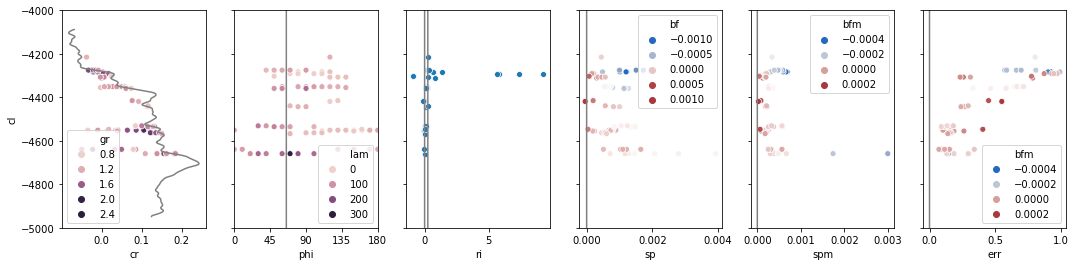

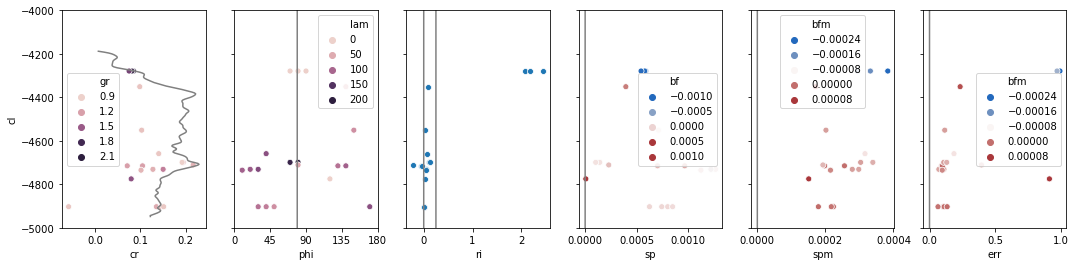

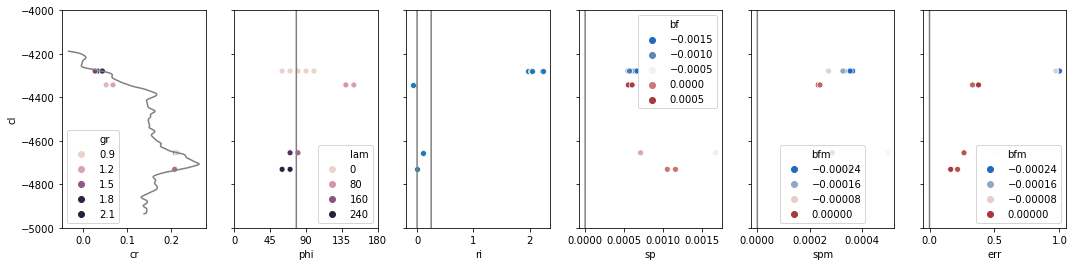

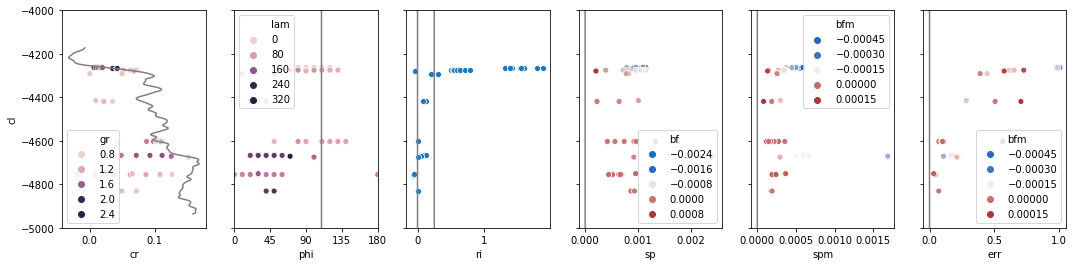

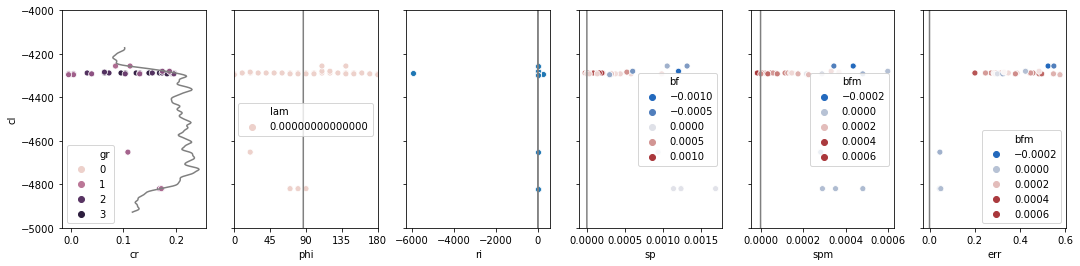

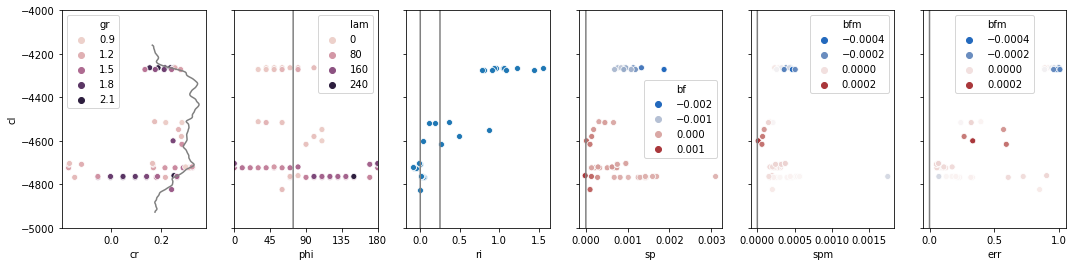

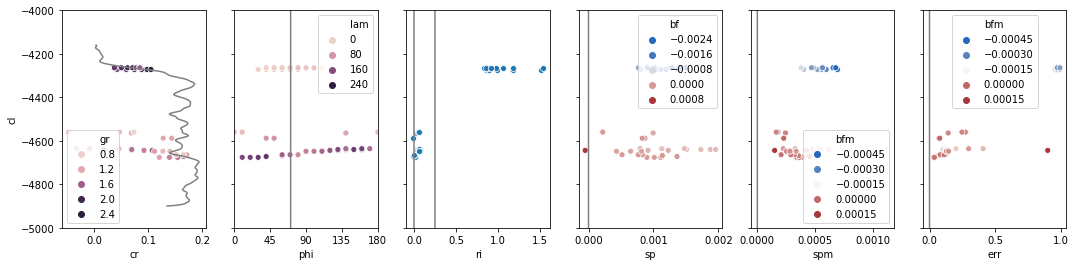

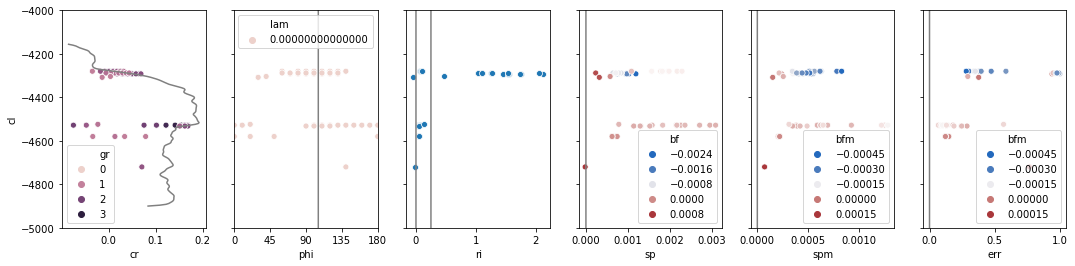

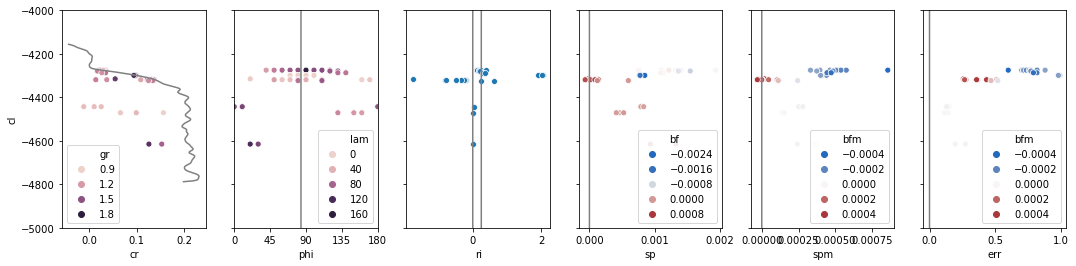

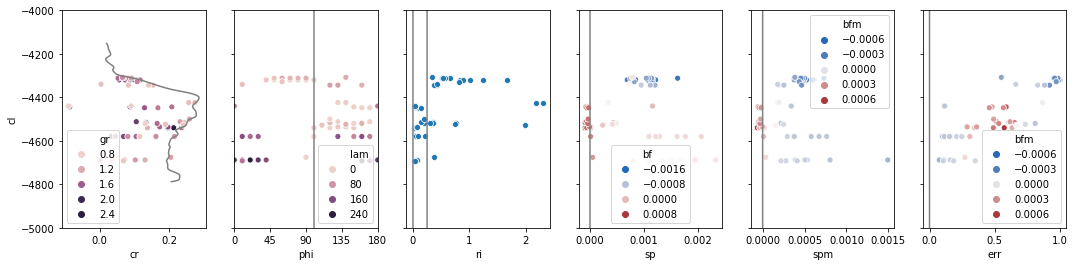

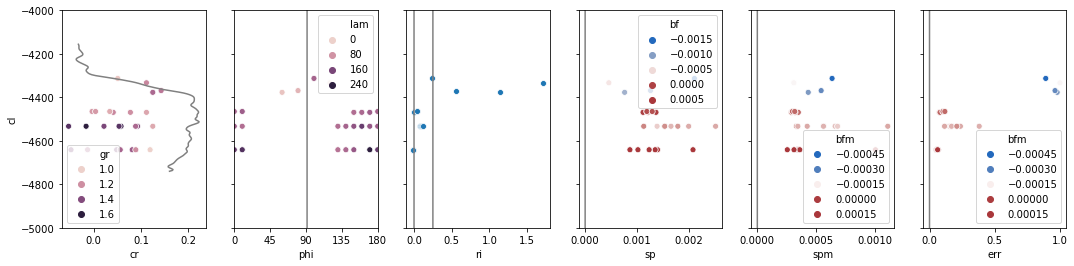

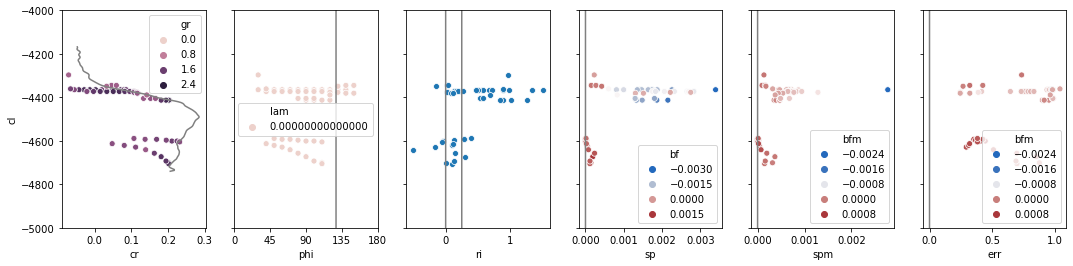

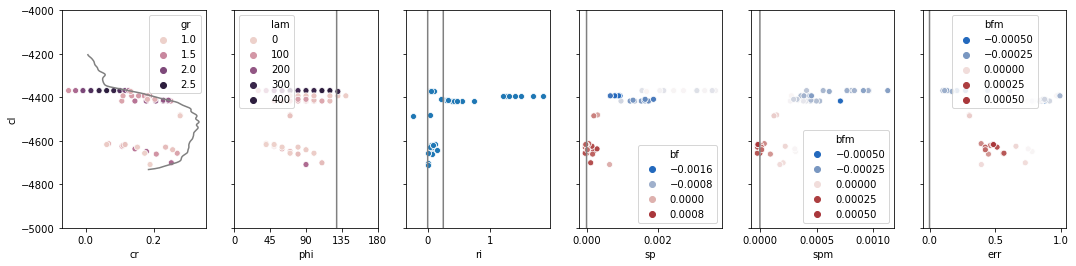

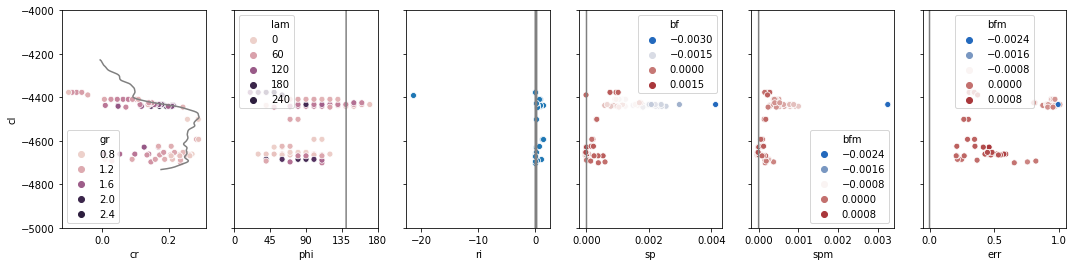

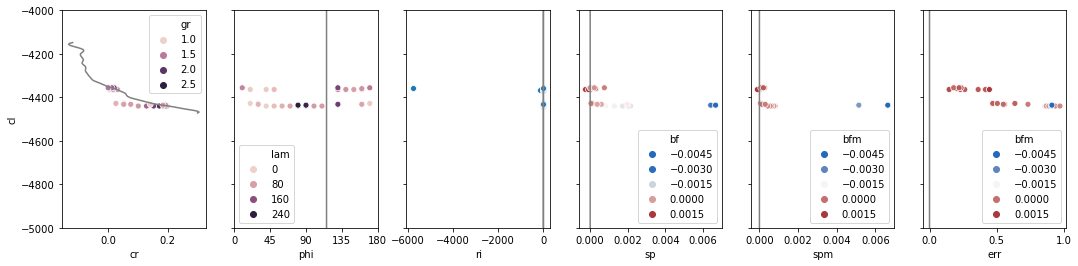

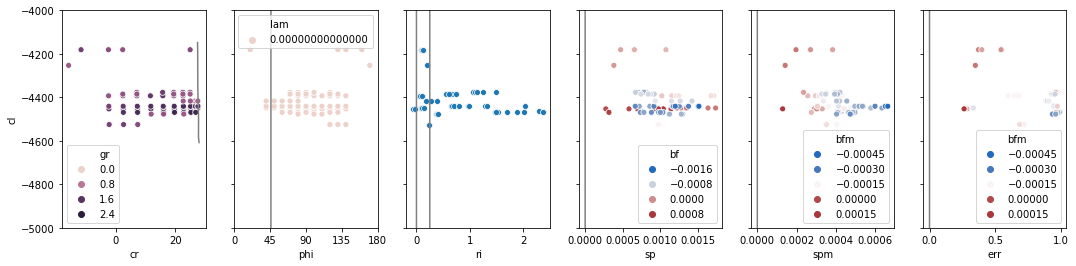

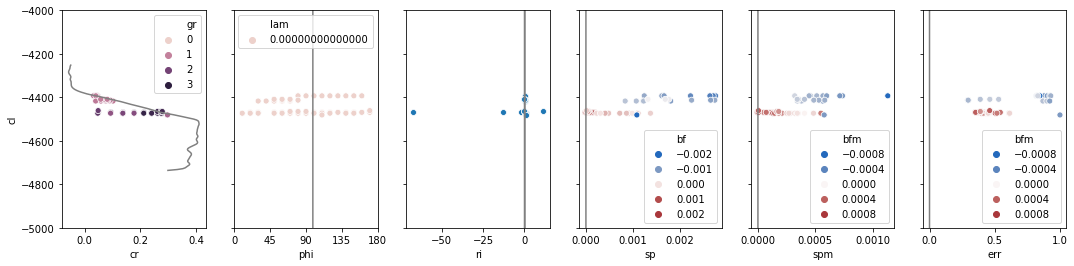

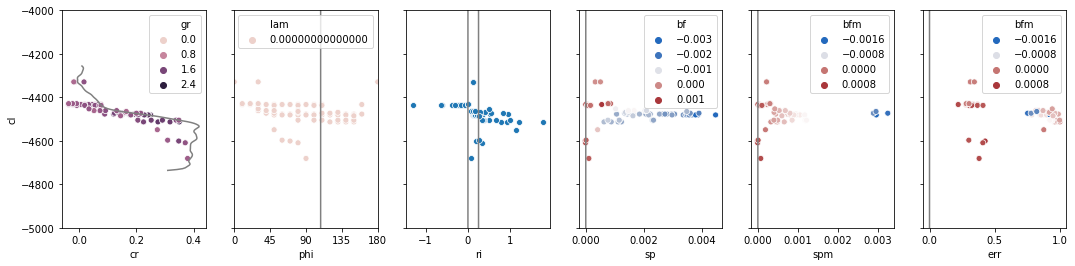

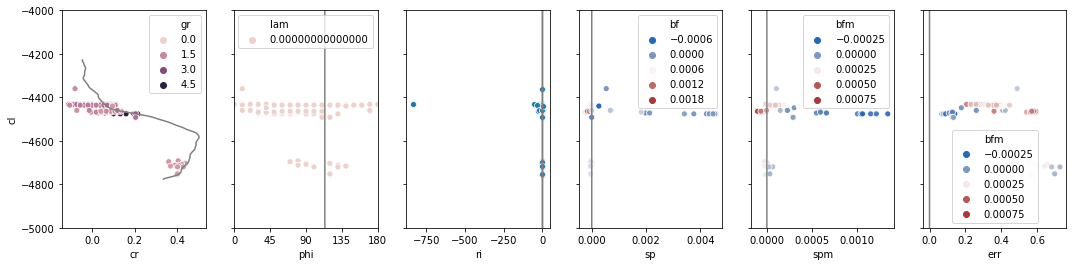

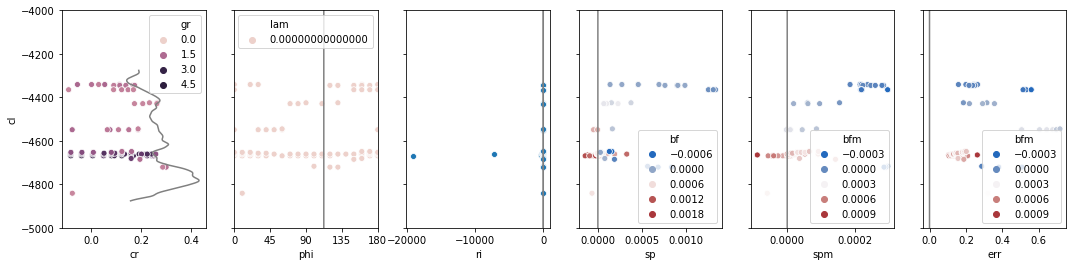

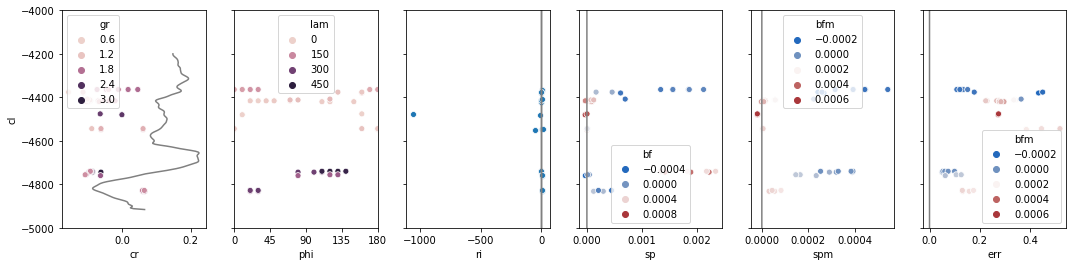

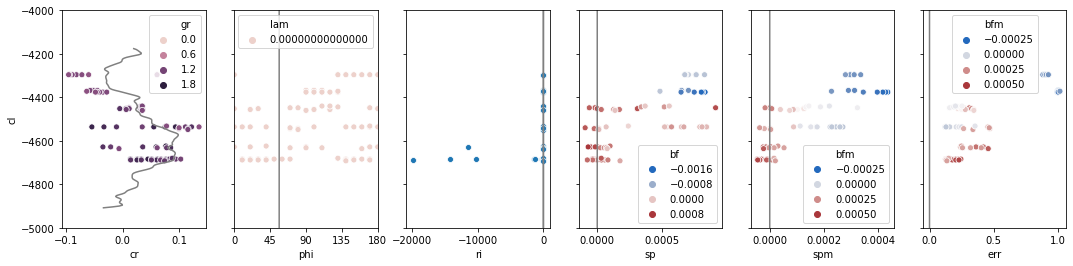

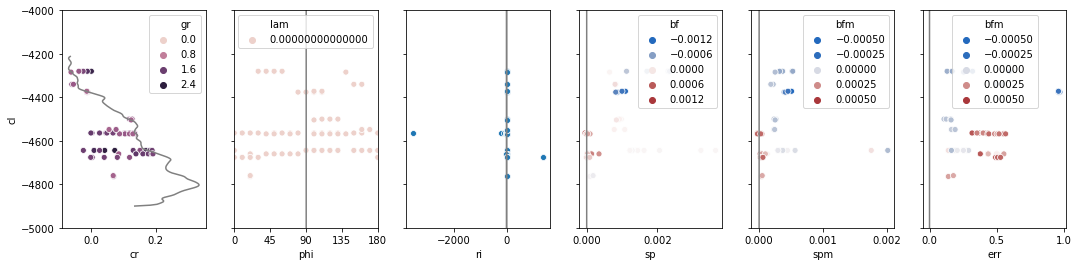

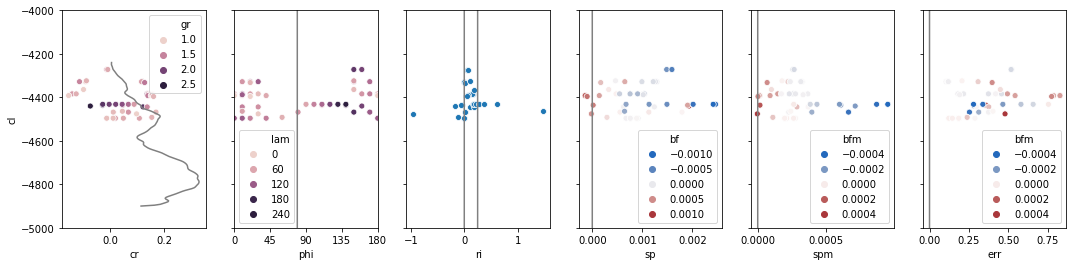

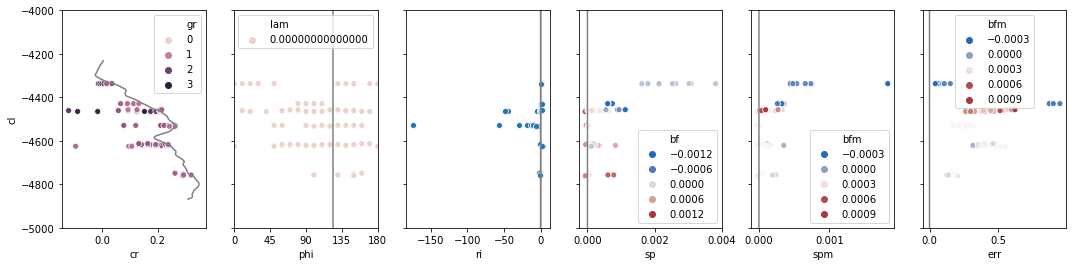

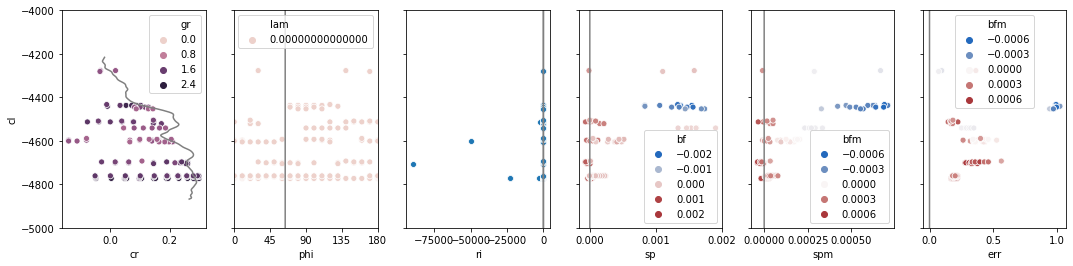

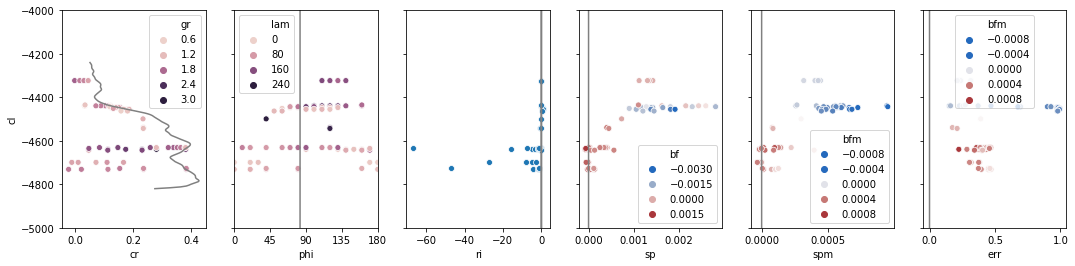

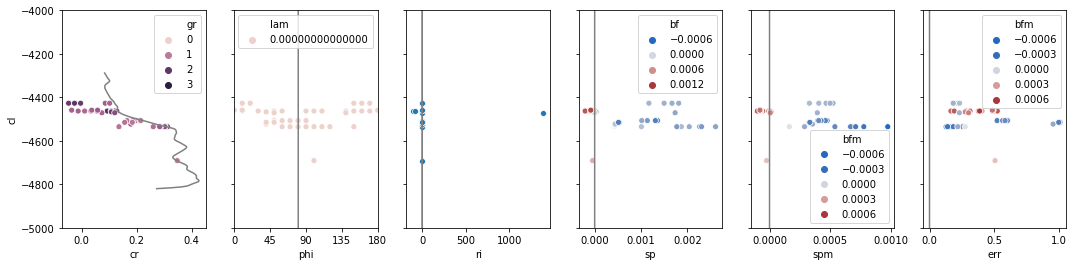

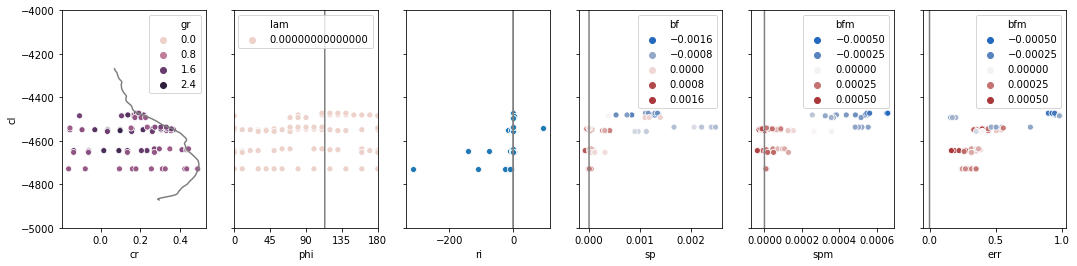

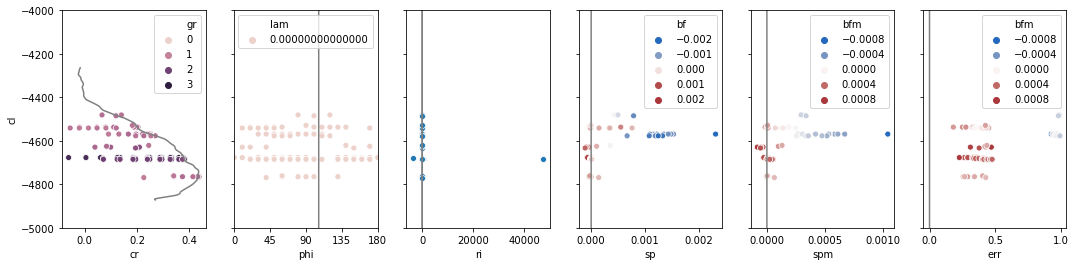

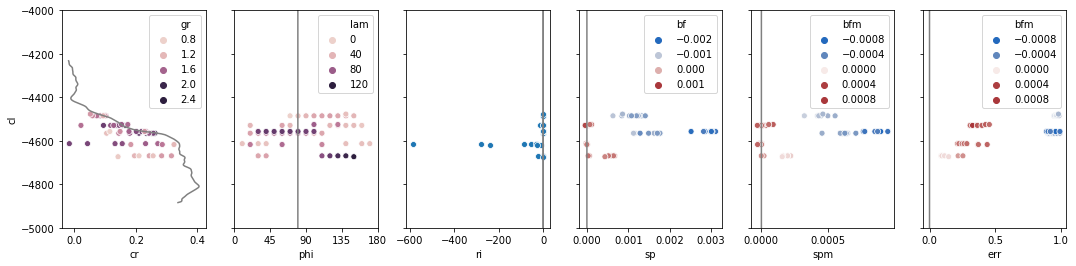

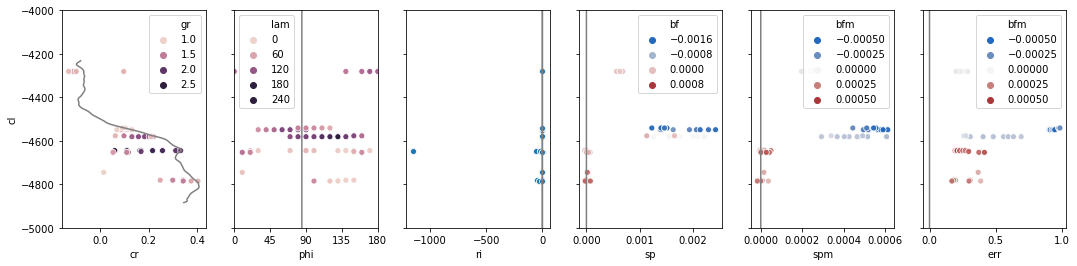

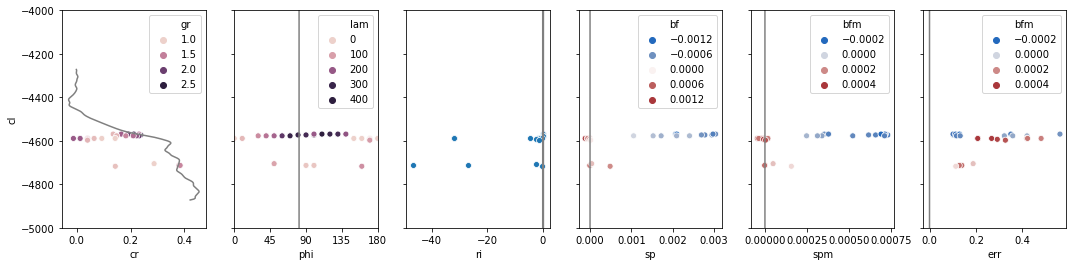

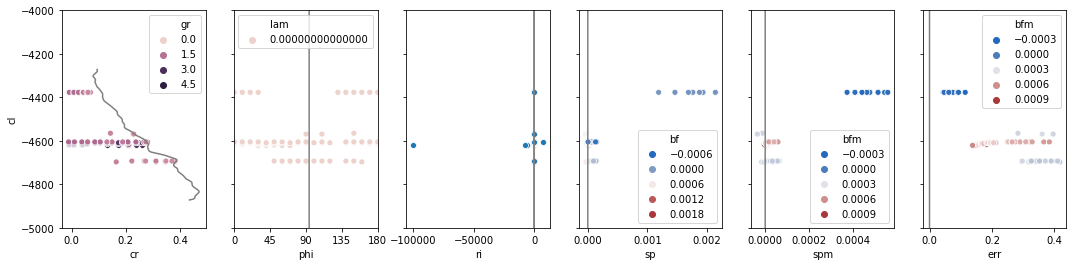

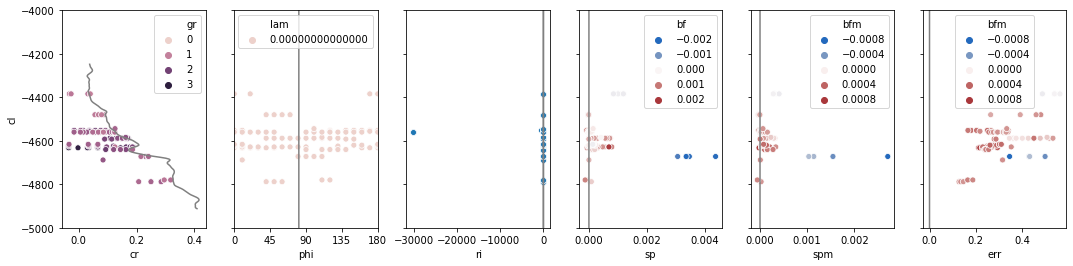

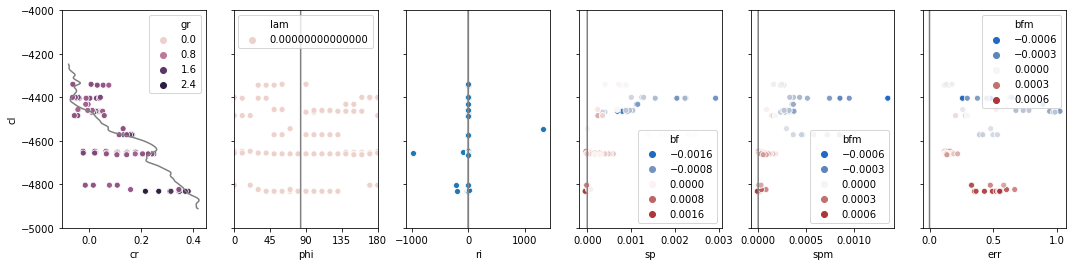

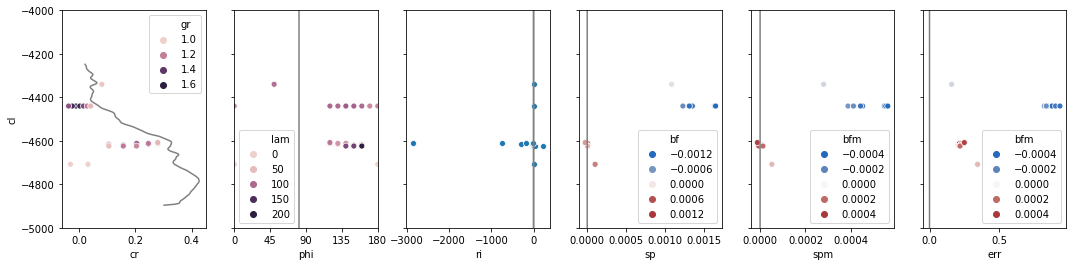

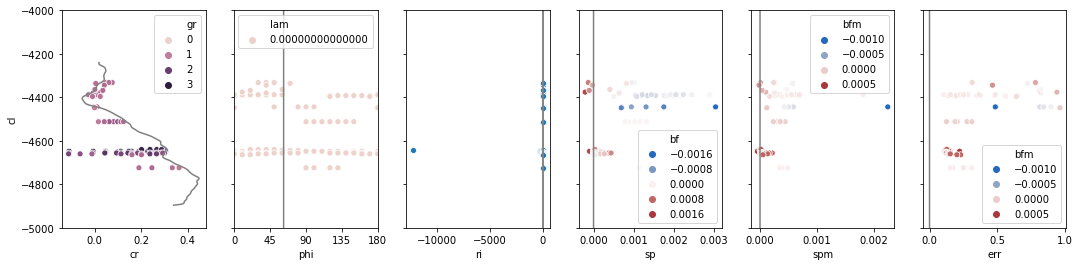

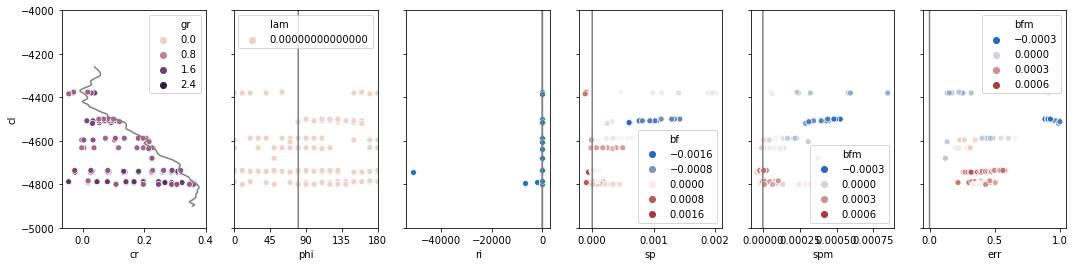

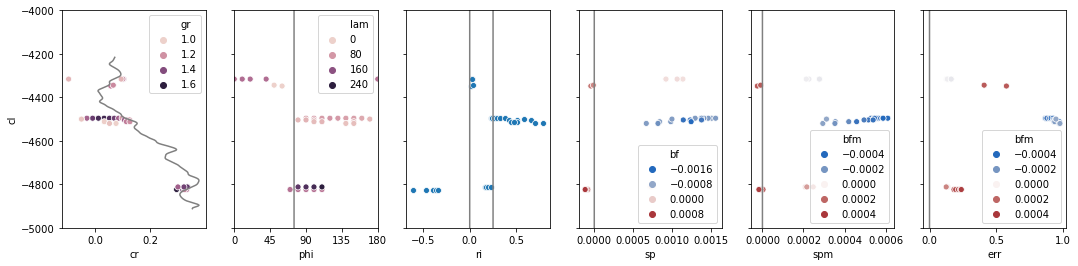

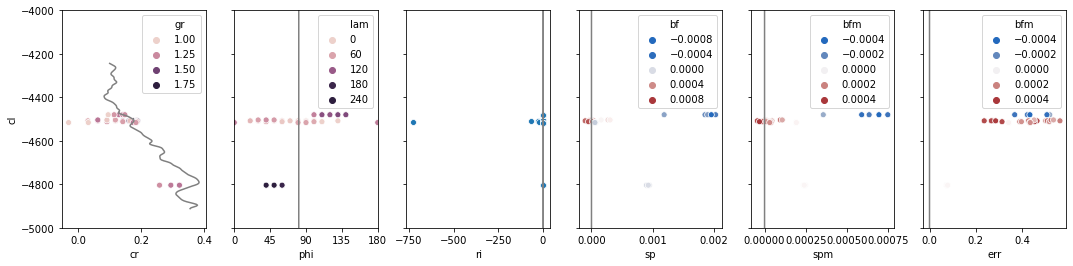

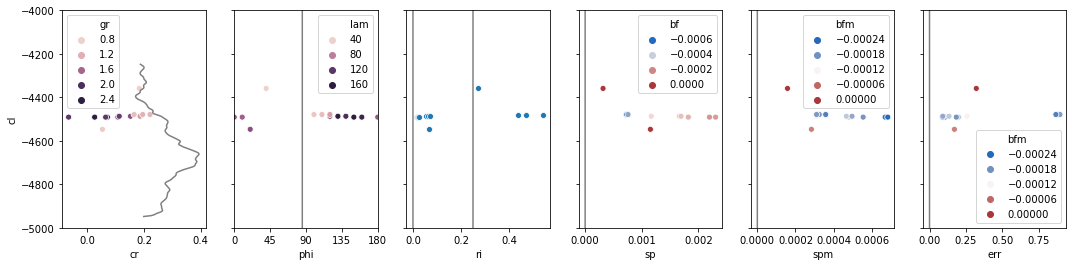

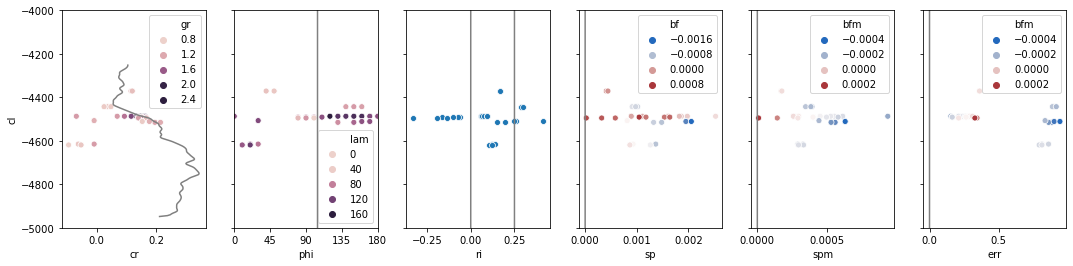

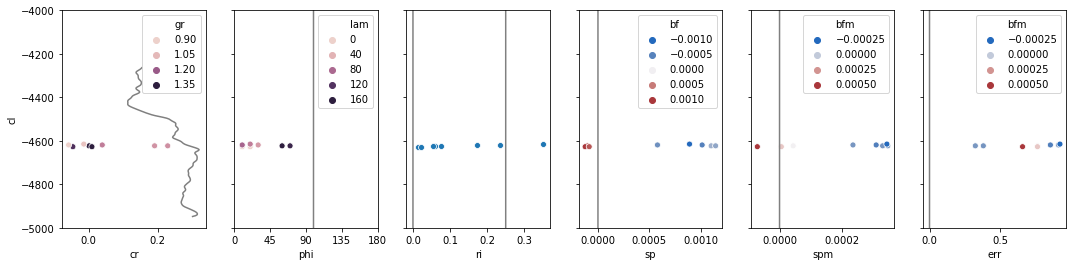

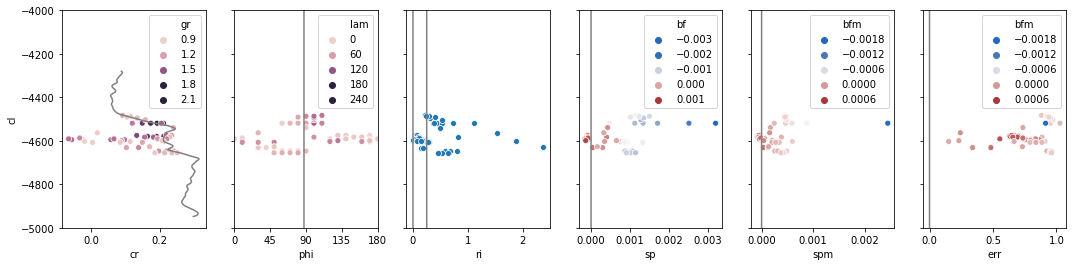

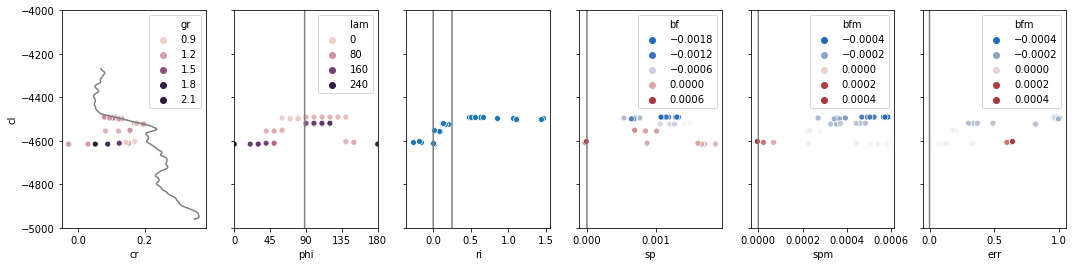

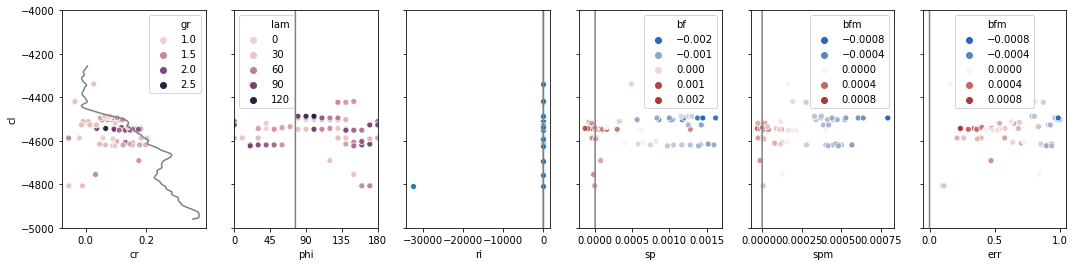

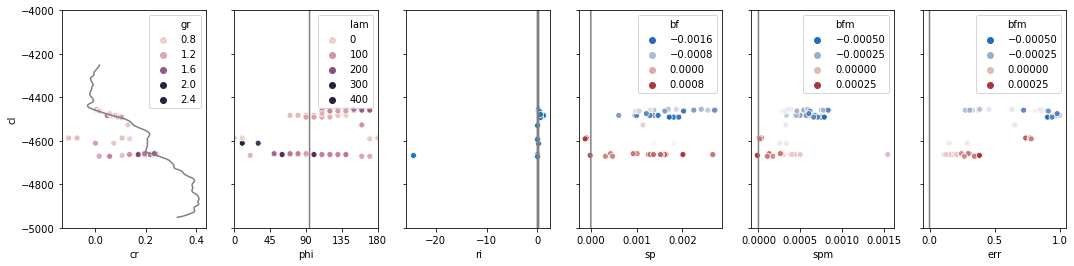

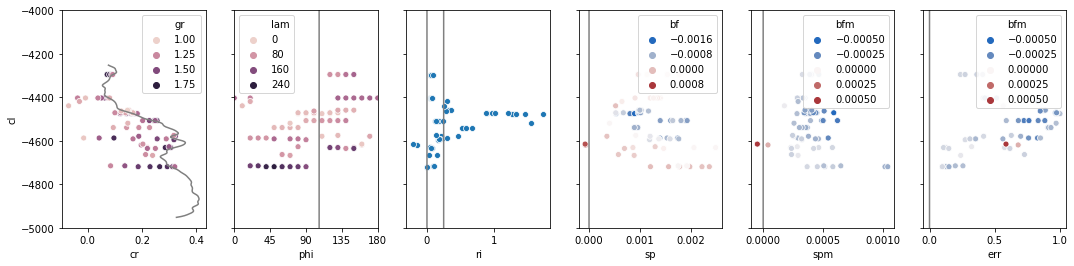

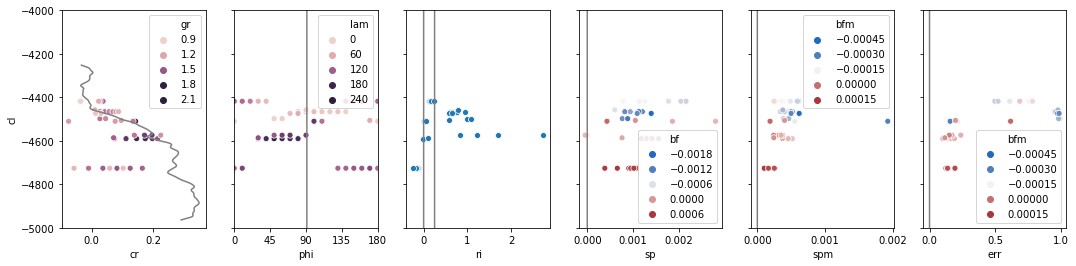

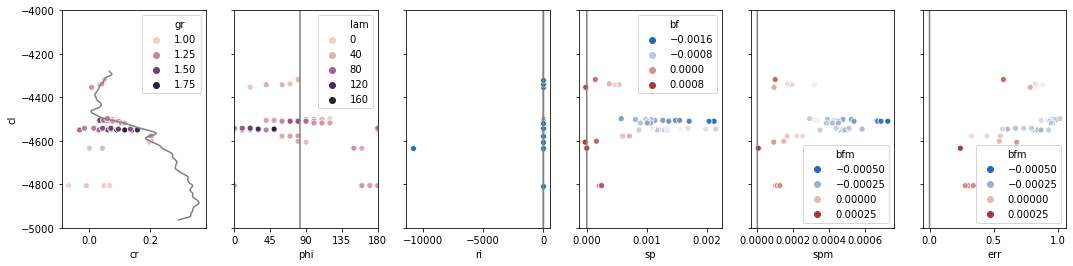

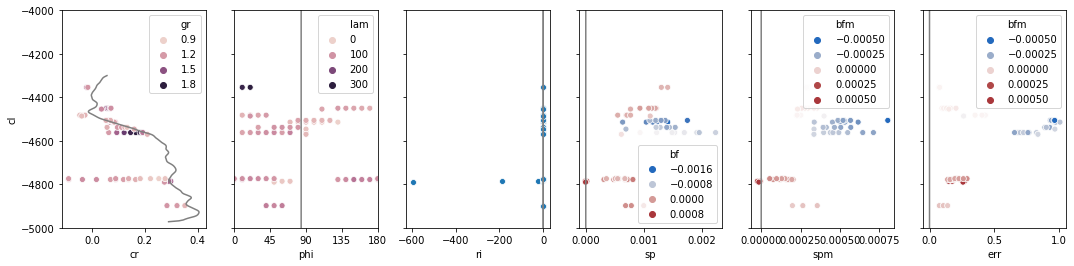

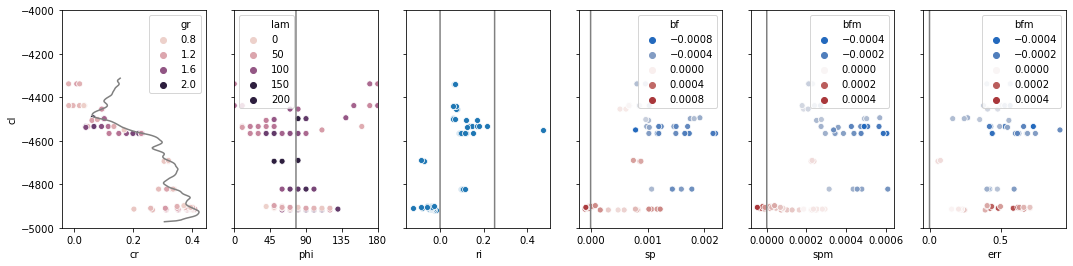

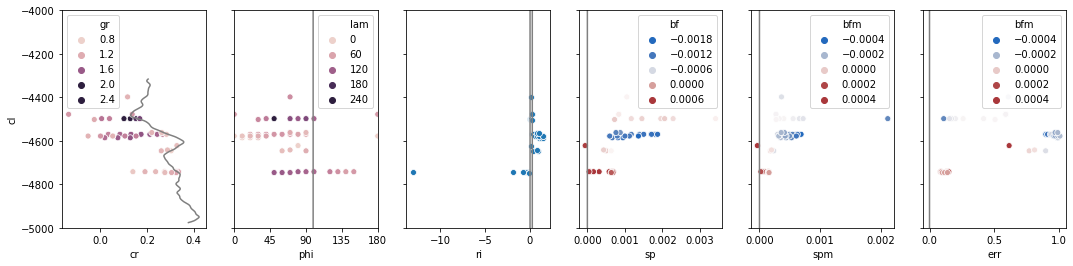

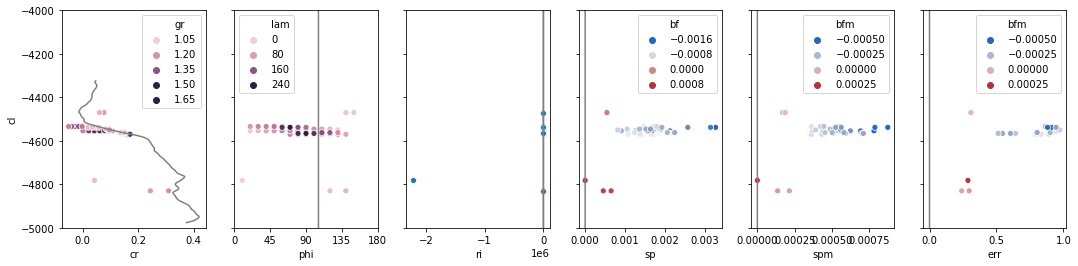

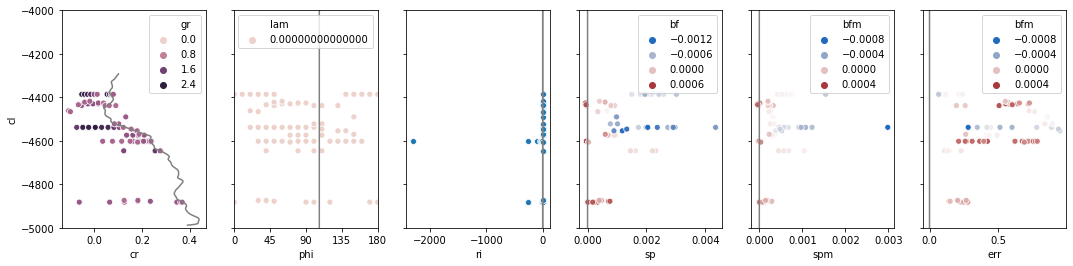

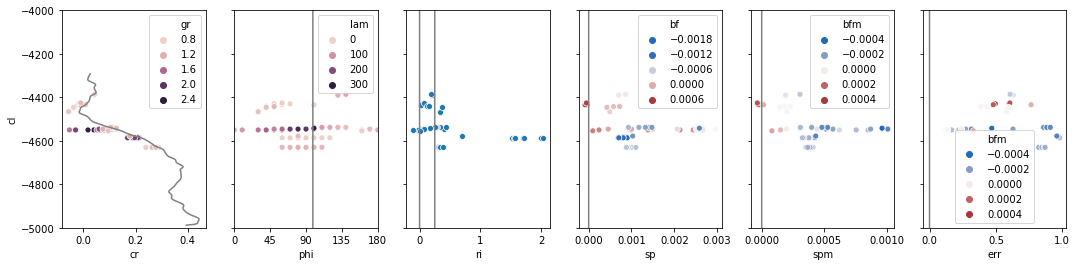

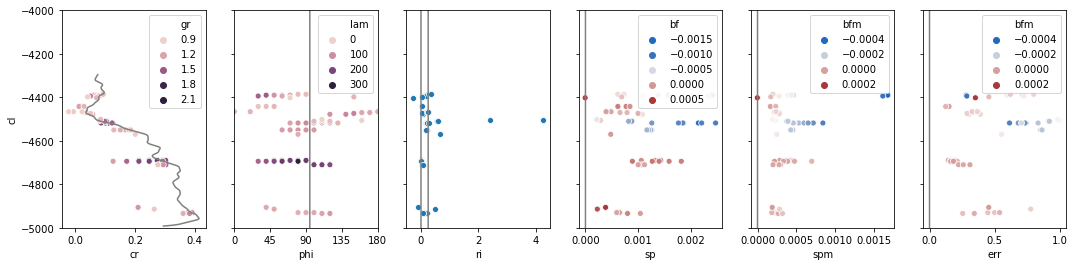

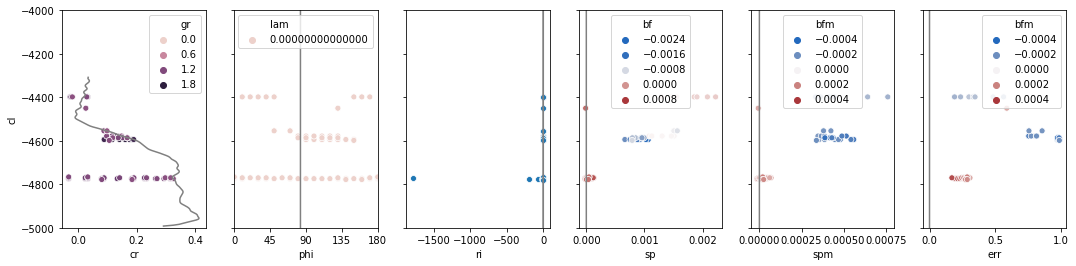

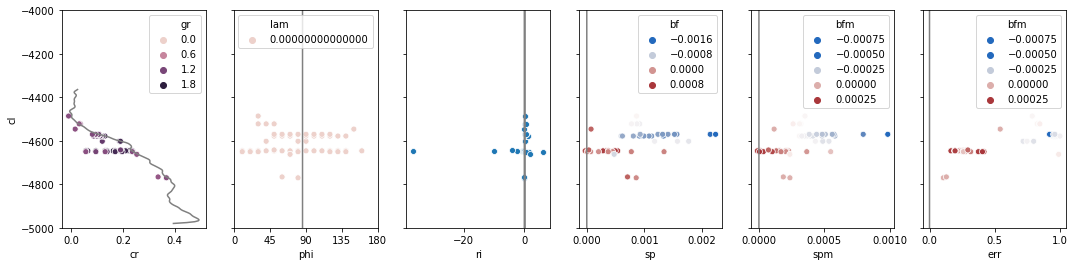

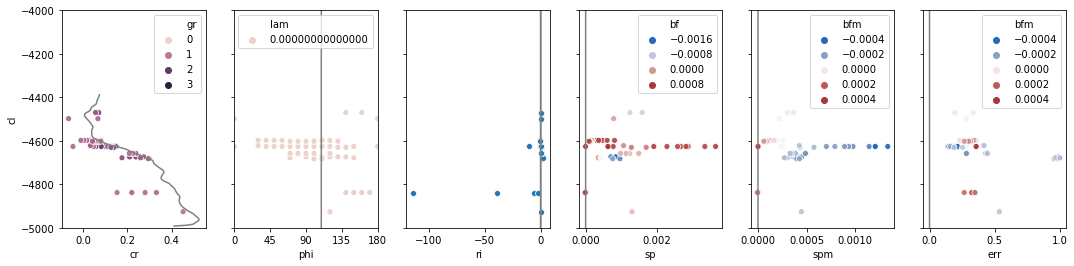

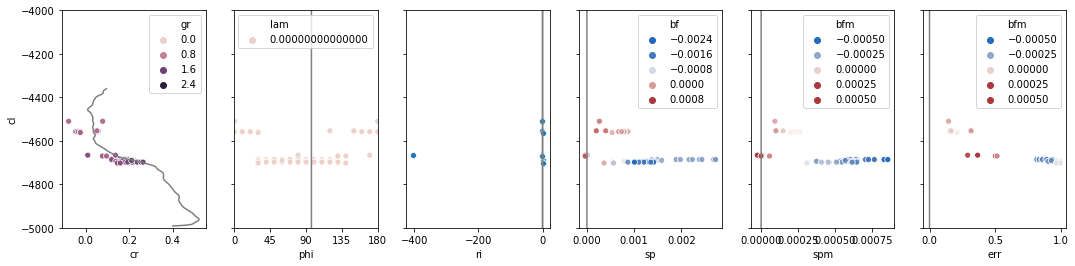

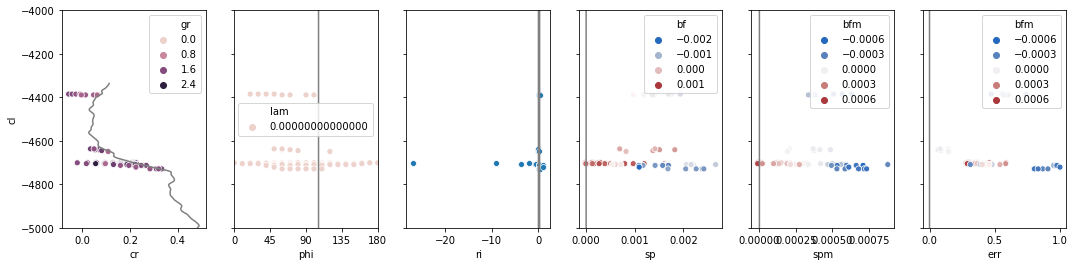

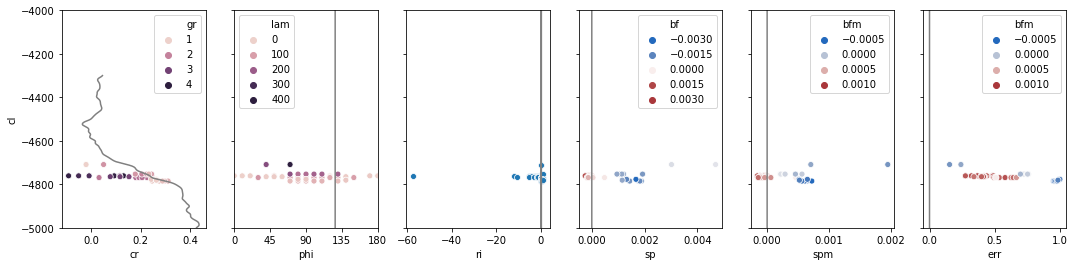

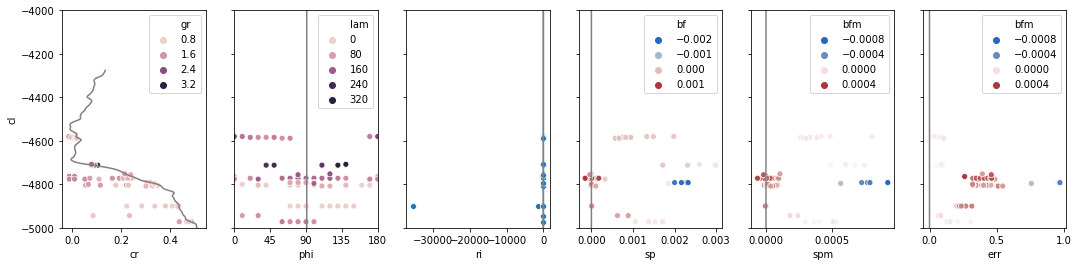

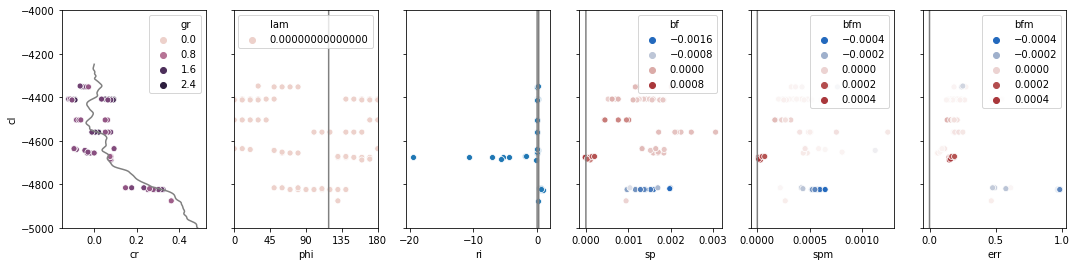

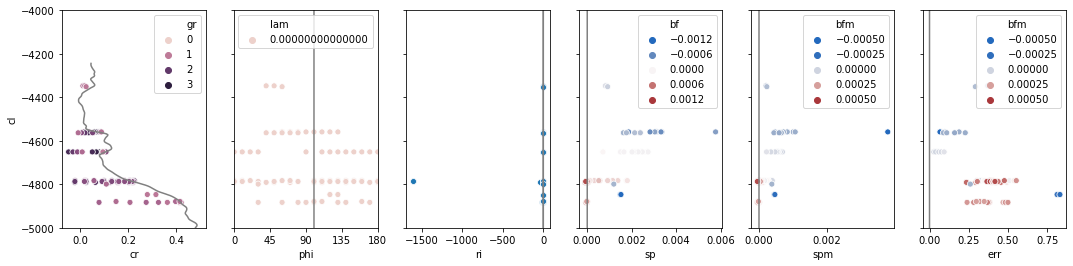

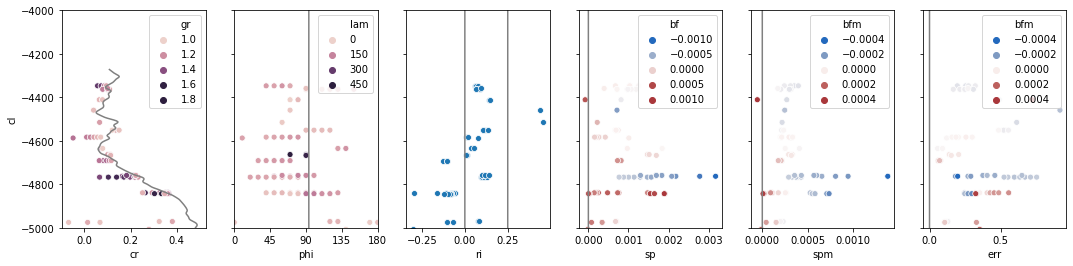

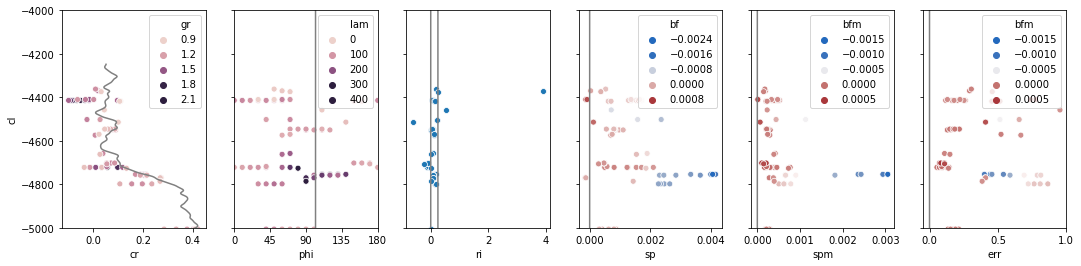

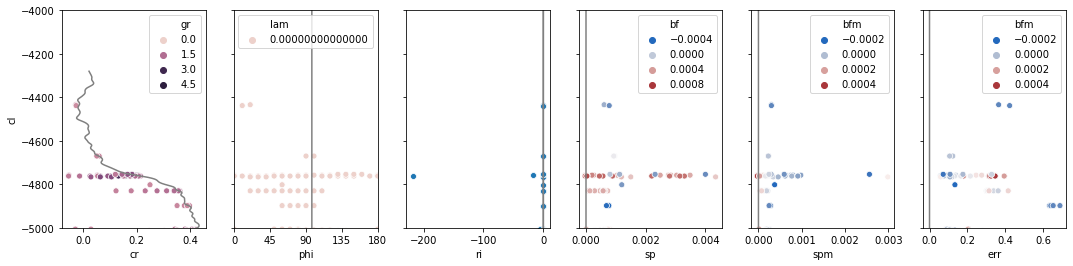

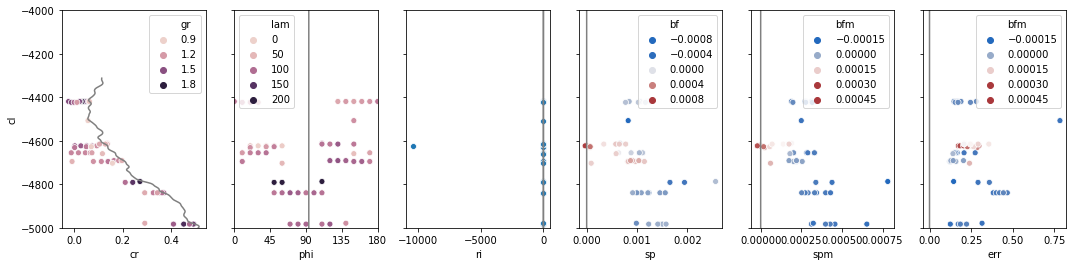

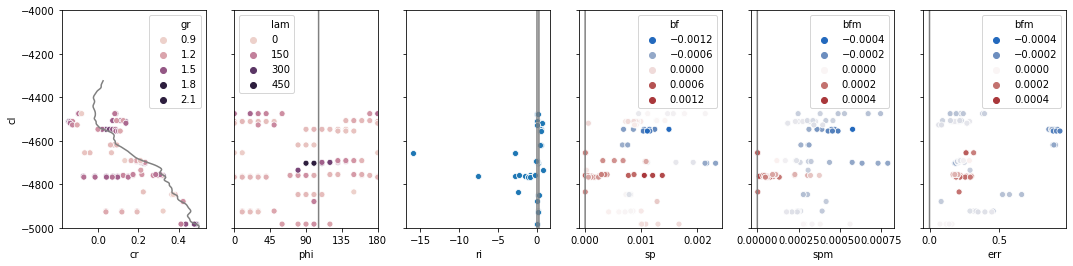

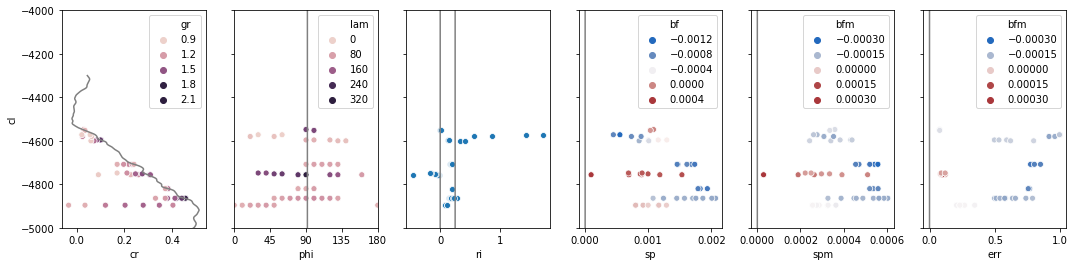

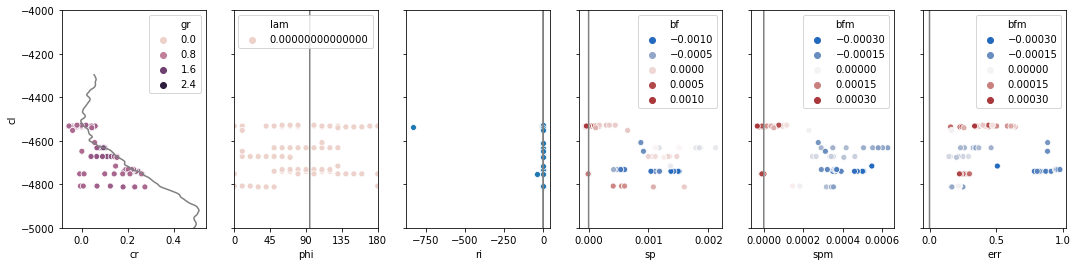

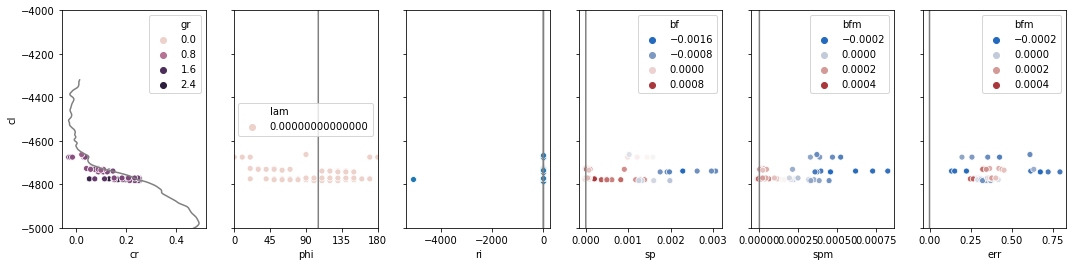

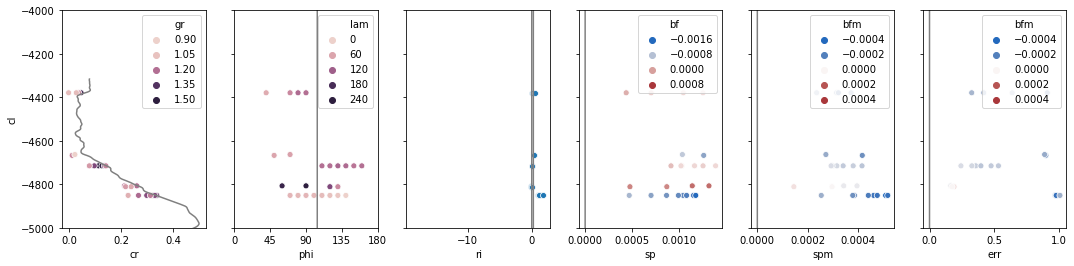

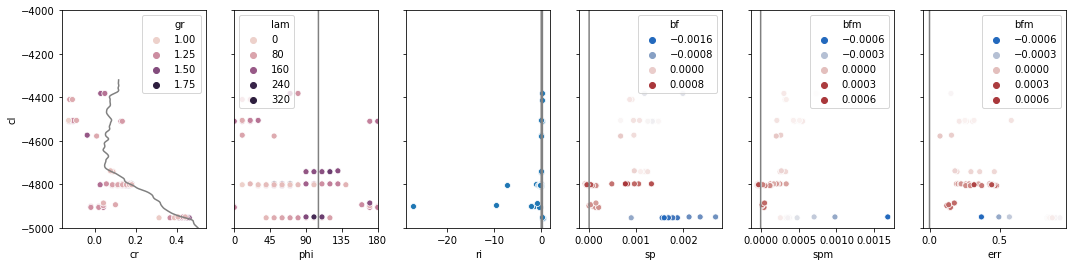

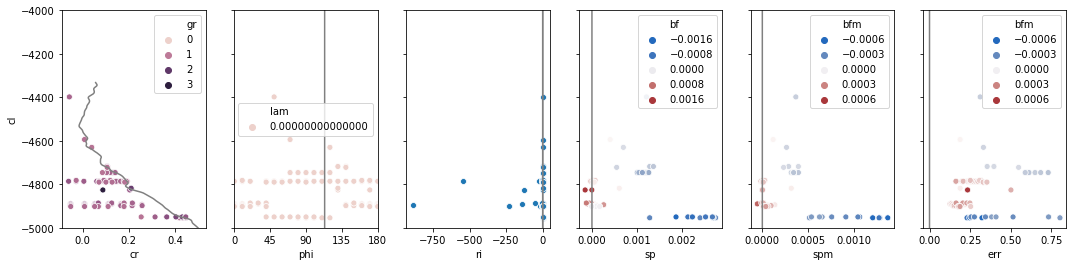

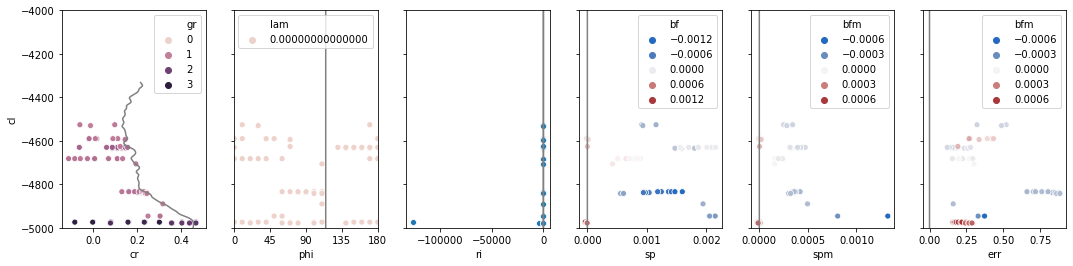

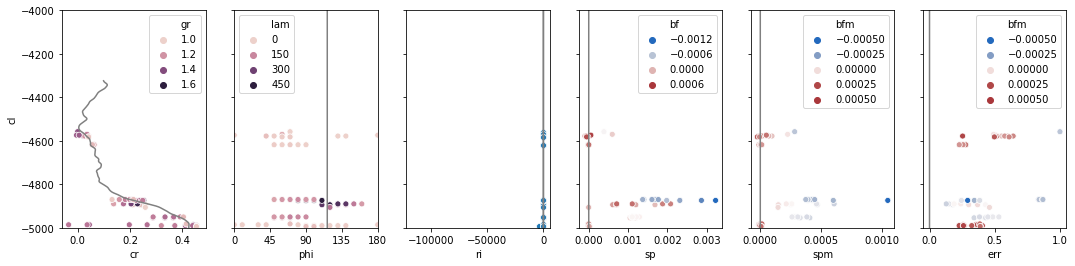

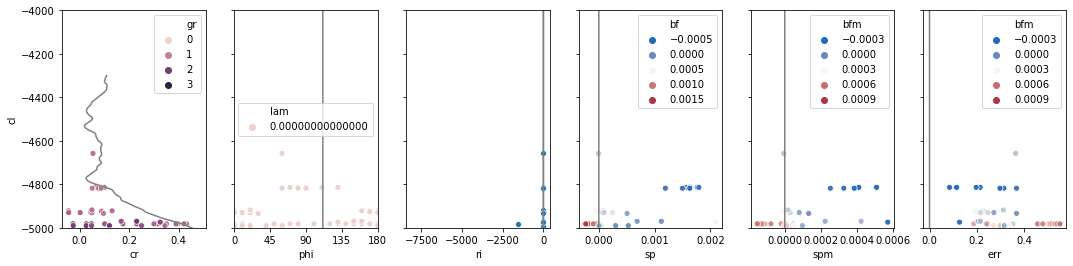

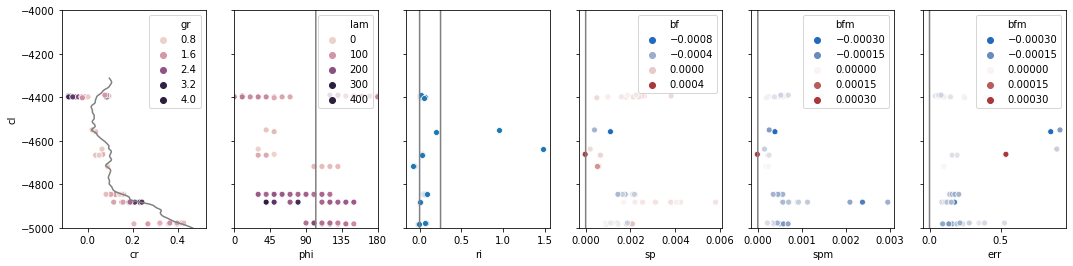

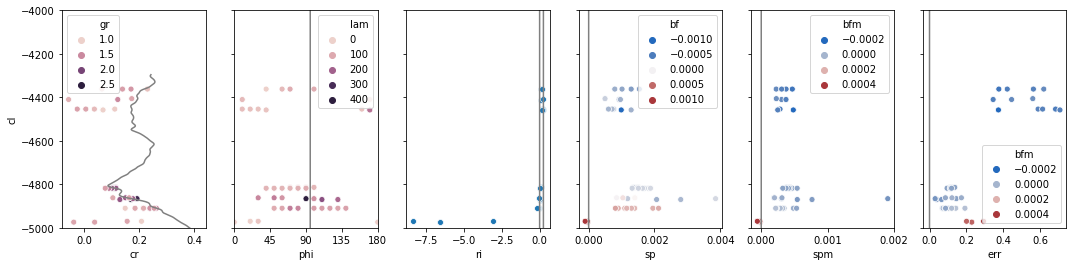

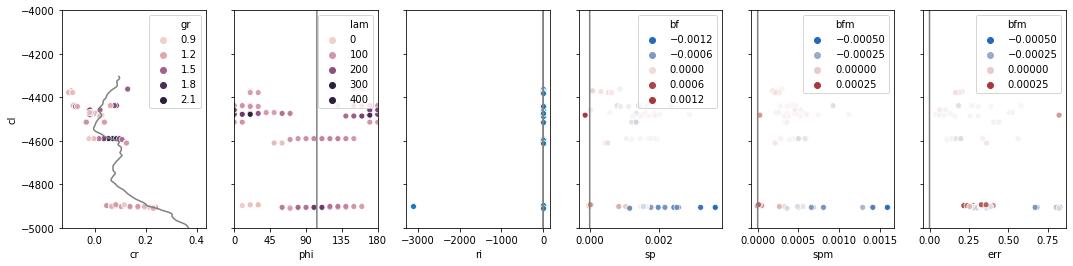

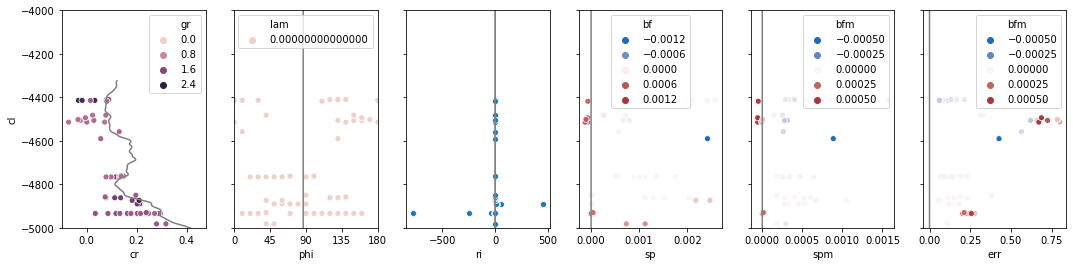

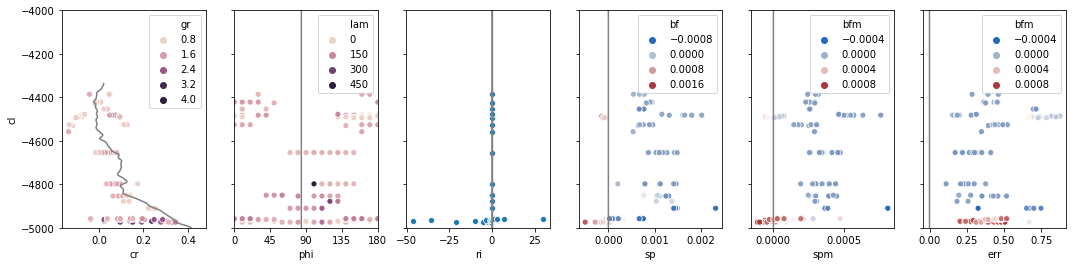

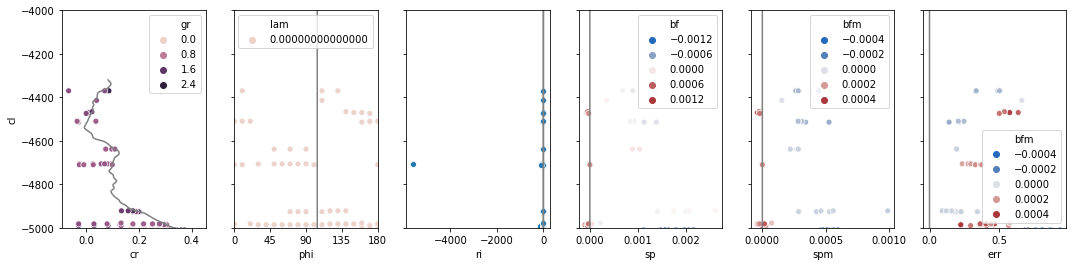

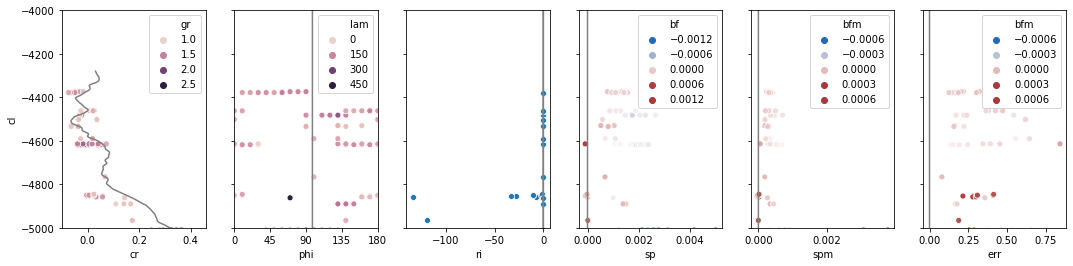

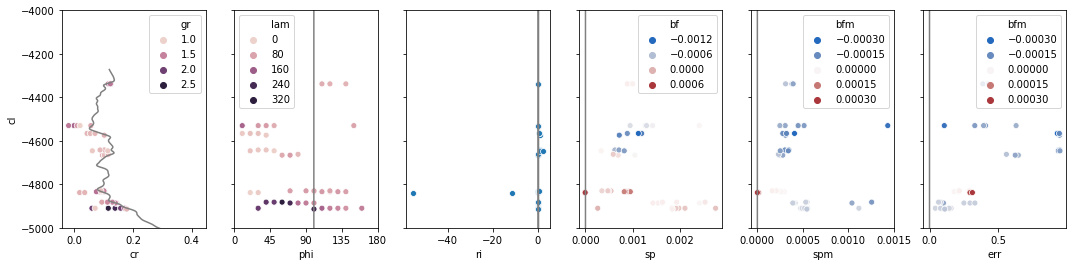

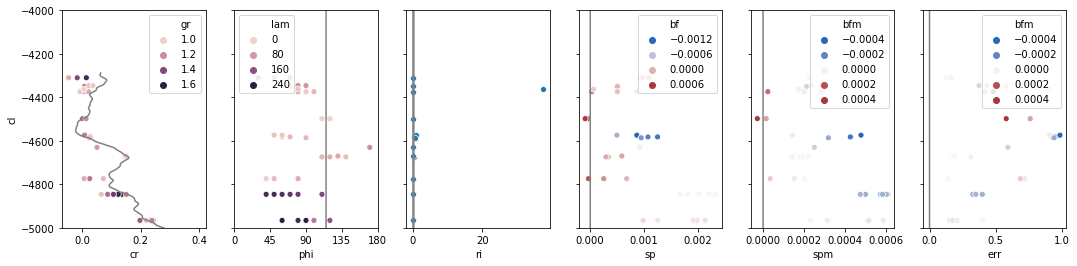

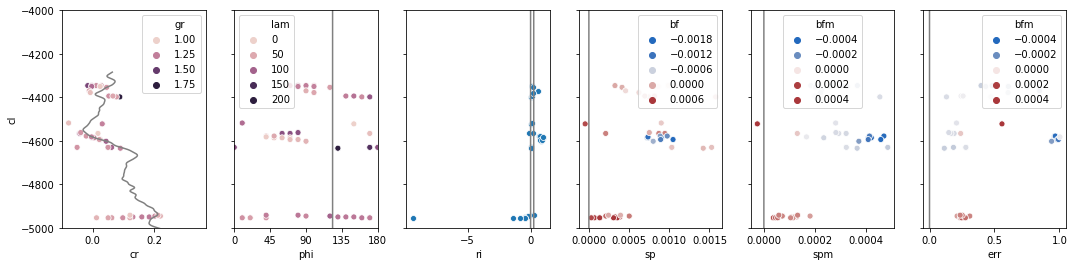

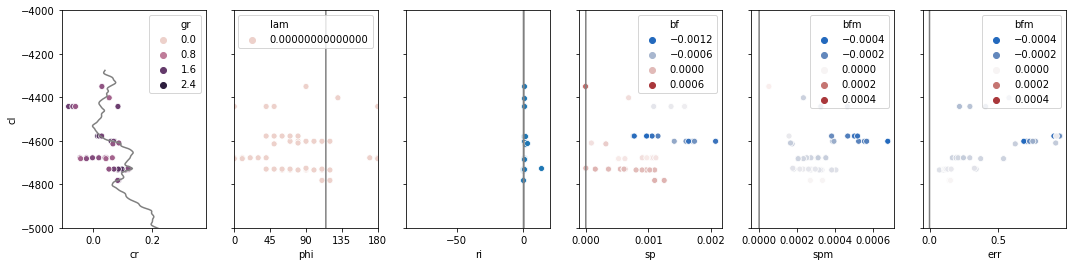

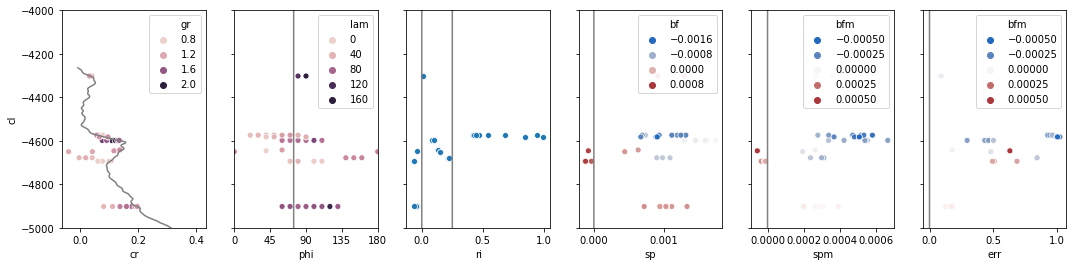

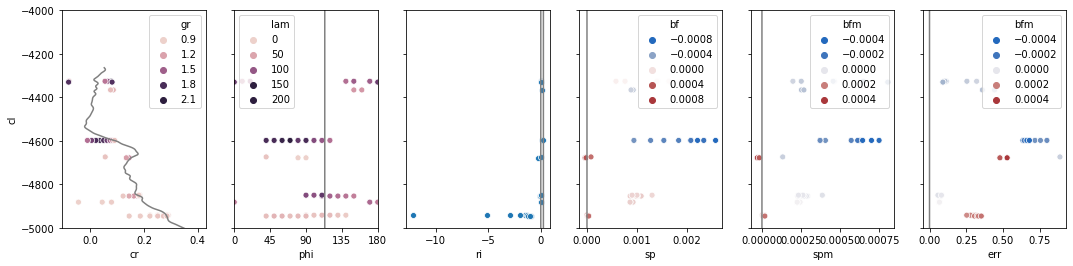

In [15]:
for i in range(len(GM_towyo_2012['LAT'])):
    data = extract_data(GM_towyo_2012, i, data_2012['sig4'], data_2012['z'])
    
    fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(18, 4), sharey=True)
    sns.scatterplot(x='cr', y='cl', hue='gr', data=data, ax=ax[0])
    ax[0].plot(GM_towyo_2012['Vm'][:, i], GM_towyo_2012['zw'], c='.5')
    ax[0].set_ylim(-5000,-4000)

    sns.scatterplot(x='phi', y='cl', hue='lam', data=data, ax=ax[1])
    ax[1].plot(np.ones(len(GM_towyo_2012['zw']),) +
               GM_towyo_2012['Phim'][i], GM_towyo_2012['zw'], c='.5')
    ax[1].set_xlim(0,180)
    ax[1].set_xticks(np.arange(0,180+1e-4,45))

    sns.scatterplot(x='ri', y='cl', data=data, ax=ax[2], palette="vlag")
    ax[2].plot(np.zeros(len(GM_towyo_2012['zw']),) + .25, GM_towyo_2012['zw'], c='.5')
    ax[2].plot(np.zeros(len(GM_towyo_2012['zw']),), GM_towyo_2012['zw'], c='.5')

    sns.scatterplot(x='sp', y='cl', hue='bf', data=data, ax=ax[3], palette="vlag")
    ax[3].plot(np.zeros(len(GM_towyo_2012['zw']),), GM_towyo_2012['zw'], c='.5')

    sns.scatterplot(x='spm', y='cl', hue='bfm', data=data, ax=ax[4], palette="vlag")
    ax[4].plot(np.zeros(len(GM_towyo_2012['zw']),), GM_towyo_2012['zw'], c='.5')

    sns.scatterplot(x='err', y='cl', hue='bfm', data=data, ax=ax[-1], palette="vlag")
    ax[-1].plot(np.zeros(len(GM_towyo_2012['zw']),), GM_towyo_2012['zw'], c='.5')


In [16]:
def extract_data_FGM(GM_towyo, i, sig4, z):
    '''flatten out data and combine the results at all the section into a panda dataframe,
    also only remain the FGM at a critical level'''
    from scipy.interpolate import interp1d
    # growing mode info
    gr = GM_towyo['GR'][i, :, 0].flatten()*3600
    cl = GM_towyo['CL'][i, :, 0].flatten()
    cr = GM_towyo['CR'][i, :, 0].flatten()
    k = GM_towyo['Kt'][i, :, 0].flatten()
    l = GM_towyo['Phi'][i, :, 0].flatten()
        
    cl_sig4 = np.zeros(cl.size) + np.nan
    f=interp1d(z[:,i], sig4[:,i], bounds_error=False, fill_value=np.nan)
    cl_sig4 = f(cl)
    cl_v = np.zeros(cl.size) + np.nan
    f=interp1d(GM_towyo['zw'], GM_towyo['Vm'][:,i], bounds_error=False, fill_value=np.nan)
    cl_v = f(cl)

    # energy budget
    sp = GM_towyo['SP'][i, :, 0].flatten()
    bf = GM_towyo['BF'][i, :, 0].flatten()
    rh = GM_towyo['RH'][i, :, 0].flatten()
    lh = GM_towyo['LH'][i, :, 0].flatten()
    spm = GM_towyo['SPm'][i, :, 0].flatten()
    bfm = GM_towyo['BFm'][i, :, 0].flatten()
    rhm = GM_towyo['RHm'][i, :, 0].flatten()
    lhm = GM_towyo['LHm'][i, :, 0].flatten()
    err = GM_towyo['ERR_K'][i, :, 0].flatten()
    # flow info
    vz = GM_towyo['Vz'][i, :, 0].flatten()
    n2 = GM_towyo['N2'][i, :, 0].flatten()
    ri = GM_towyo['Ri'][i, :, 0].flatten()
    lon = np.ones(gr.size) * GM_towyo['LON'][i]
    lat = np.ones(gr.size) * GM_towyo['LAT'][i]
    # other info
    # 1 - FGM is found at the ends of a mode family, Smyth (2013) rejected this type of mode family
    end = GM_towyo['END'][i, :, 0].flatten()
    ze = np.ones(gr.size) * GM_towyo['zw'][np.where(~np.isnan(GM_towyo['Vm'][:,i]))[0][0]] #end
    zs = np.ones(gr.size) * GM_towyo['zw'][np.where(~np.isnan(GM_towyo['Vm'][:,i]))[0][-1]] #start

    # get rid of nans
    mask = ~np.isnan(gr)
    gr = gr[mask]
    cl = cl[mask]
    cl_sig4 = cl_sig4[mask]
    cl_v = cl_v[mask]
    cr = cr[mask]
    k = k[mask]
    l = l[mask]
    sp = sp[mask]
    bf = bf[mask]
    rh = rh[mask]
    lh = lh[mask]
    spm = spm[mask]
    bfm = bfm[mask]
    rhm = rhm[mask]
    lhm = lhm[mask]
    err = err[mask]
    vz = vz[mask]
    n2 = n2[mask]
    ri = ri[mask]
    end = end[mask]
    lon = lon[mask]
    lat = lat[mask]
    ze = ze[mask]
    zs = zs[mask]
    
    data = pd.DataFrame({'gr': gr, 'cl': cl, 'cl_sig4': cl_sig4, 'cl_v': cl_v, 'cr': cr, 'lam': 2*np.pi/k, 'phi': l, 
                 'sp': sp, 'bf': bf,'rh': rh, 'lh': lh, 'spm': spm, 'bfm': bfm, 'rhm': rhm, 'lhm': lhm, 'err': err,
                 'vz': vz, 'n2': n2, 'ri': ri, 'end': end, 'lon': lon, 'lat': lat, 'ze': ze, 'zs': zs})

    return data

In [17]:
for i in range(len(GM_towyo_2012['LAT'])):    
    if i == 0:
        data = extract_data(GM_towyo_2012, i, data_2012['sig4'], data_2012['z'])
    else:
        data = pd.concat([data, extract_data(GM_towyo_2012, i, data_2012['sig4'], data_2012['z'])], axis=0) 
        
for i in range(len(GM_towyo_2012['LAT'])):    
    if i == 0:
        data_FGM = extract_data_FGM(GM_towyo_2012, i, data_2012['sig4'], data_2012['z'])
    else:
        data_FGM = pd.concat([data_FGM, extract_data_FGM(GM_towyo_2012, i, data_2012['sig4'], data_2012['z'])], axis=0) 

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in true_divide


- Critical level for unstable modes with growth rate greater than gr_thred (default = 1) $hr^{-1}$
- Energy budget error level do not greater than err_thred


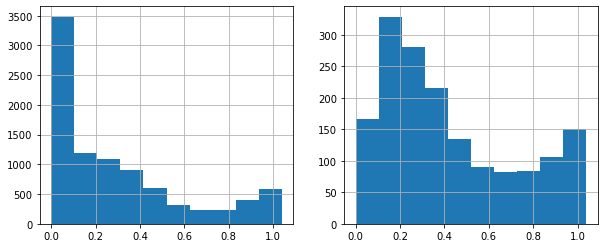

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)
data.err.hist(ax=ax[0])
data_FGM.err.hist(ax=ax[1])

In [19]:
# quality control
gr_thred = 1
err_thred = .5
mask_good = ((np.abs(data.cl - data.zs) > 10) & (np.abs(data.cl - data.ze) > 10) & (data.err <= err_thred) & (data.gr >= gr_thred))
# shear instability mask
mask_shear = (((data.sp > 0) & (data.bf < 0)) | ((data.sp > 0) & (data.bf > 0) & (data.sp > data.bf)))
mask_shear_m = (((data.spm > 0) & (data.bfm < 0)) | ((data.spm > 0) & (data.bfm > 0) & (data.spm > data.bfm)))
# convective instability mask
mask_convec = (((data.bf > 0) & (data.sp < 0)) | ((data.bf > 0) & (data.sp > 0) & (data.sp < data.bf)))
mask_convec_m = (((data.bfm > 0) & (data.spm < 0)) | ((data.bfm > 0) & (data.spm > 0) & (data.spm < data.bfm)))

mask_FGM_good = ((np.abs(data_FGM.cl - data_FGM.zs) > 10) & (np.abs(data_FGM.cl - data_FGM.ze) > 10) & (data_FGM.err <= err_thred) & (data_FGM.gr >= gr_thred))
# shear instability mask
mask_FGM_shear = (((data_FGM.sp > 0) & (data_FGM.bf < 0)) | ((data_FGM.sp > 0) & (data_FGM.bf > 0) & (data_FGM.sp > data_FGM.bf)))
mask_FGM_shear_m = (((data_FGM.spm > 0) & (data_FGM.bfm < 0)) | ((data_FGM.spm > 0) & (data_FGM.bfm > 0) & (data_FGM.spm > data_FGM.bfm)))
# convective instability mask
mask_FGM_convec = (((data_FGM.bf > 0) & (data_FGM.sp < 0)) | ((data_FGM.bf > 0) & (data_FGM.sp > 0) & (data_FGM.sp < data_FGM.bf)))
mask_FGM_convec_m = (((data_FGM.bfm > 0) & (data_FGM.spm < 0)) | ((data_FGM.bfm > 0) & (data_FGM.spm > 0) & (data_FGM.spm < data_FGM.bfm)))


In [20]:
data_FGM[(mask_FGM_good & mask_FGM_shear)]

gr      cl      cl_sig4      cl_v        cr         lam    phi  \
2   1.949020 -4659.0  1045.980079  0.176589  0.181926  157.826479   60.0   
3   1.919576 -4551.0  1045.977399  0.144660  0.105436   43.469022  120.0   
4   1.852004 -4555.0  1045.977317  0.142063  0.121879   39.644219  110.0   
6   1.786965 -4563.0  1045.977448  0.145498  0.121990   45.517654  110.0   
8   1.688410 -4639.0  1045.979743  0.150269 -0.022386   79.100617  170.0   
..       ...     ...          ...       ...       ...         ...    ...   
2   1.770403 -4330.0  1045.917232  0.024665 -0.080892  119.723628    0.0   
4   1.251163 -4854.0  1045.962332  0.183623  0.174503   90.819659  120.0   
5   1.145313 -4850.0  1045.962240  0.175914  0.184143  104.274921  100.0   
6   1.126420 -4366.0  1045.919328  0.019056  0.085386   57.303331  160.0   
10  1.031670 -4882.0  1045.962348  0.197361  0.078650   86.732101  170.0   

          sp        bf        rh  ...       lhm       err        vz  \
2   0.002070 -0.000169  0.000806  ...  0.000454  0.133559 -0.003296   
3   0.000737  0.000050  0.000385  ...  0.000270  0.169009  0.001929   
4   0.000245  0.000025  0.000232  ...  0.000194  0.185398  0.001266   
6   0.000458 -0.000012  0.000295  ...  0.000227  0.164036 -0.001672   
8   0.001214  0.000078  0.000411  ...  0.000271  0.091236 -0.002513   
..       ...       ...       ...  ...       ...       ...       ...   
2   0.001848 -0.000073  0.000714  ...  0.000476  0.091151  0.002798   
4   0.001084  0.000053  0.000359  ...  0.000228  0.069051 -0.001985   
5   0.001000  0.000031  0.000371  ...  0.000202  0.075081 -0.001847   
6   0.000925 -0.000247  0.000062  ...  0.000176  0.442865  0.002077   
10  0.000922  0.000046  0.000322  ...  0.000185  0.064298 -0.001774   

              n2        ri  end         lon       lat      ze      zs  
2   3.061143e-07  0.028185  0.0 -168.717617 -8.240192 -4948.0 -4088.0  
3  -7.313775e-08 -0.019653  1.0 -168.717617 -8.240192 -4948.0 -4088.0  
4  -7.385637e-08 -0.046067  1.0 -168.717617 -8.240192 -4948.0 -4088.0  
6   2.019927e-09  0.000723  1.0 -168.717617 -8.240192 -4948.0 -4088.0  
8  -1.277638e-07 -0.020226  0.0 -168.717617 -8.240192 -4948.0 -4088.0  
..           ...       ...  ...         ...       ...     ...     ...  
2   1.171077e-07  0.014956  1.0 -168.600482 -7.991682 -5100.0 -4264.0  
4  -1.072301e-07 -0.027211  0.0 -168.600482 -7.991682 -5100.0 -4264.0  
5  -4.828223e-08 -0.014156  0.0 -168.600482 -7.991682 -5100.0 -4264.0  
6   3.927721e-07  0.091011  0.0 -168.600482 -7.991682 -5100.0 -4264.0  
10 -3.953216e-08 -0.012563  0.0 -168.600482 -7.991682 -5100.0 -4264.0  

[638 rows x 24 columns]

In [21]:
data_FGM[(mask_FGM_good & mask_FGM_convec)]

gr      cl      cl_sig4      cl_v        cr        lam    phi  \
15  1.317172 -4415.0  1045.968012  0.121677  0.076336  36.155958  130.0   
20  1.162890 -4547.0  1045.977462  0.146558  0.017778  31.490523  160.0   
0   2.407328 -4288.0  1045.935274  0.199222  0.103523  25.013811  150.0   
5   1.697579 -4600.0  1045.978115  0.302214  0.247876  25.013811  110.0   
14  1.139593 -4580.0  1045.978020  0.302436  0.281129  39.644219  100.0   
..       ...     ...          ...       ...       ...        ...    ...   
8   1.261596 -4950.0  1045.962879  0.200677  0.183639  86.732101  130.0   
16  1.196802 -4954.0  1045.962059  0.195354  0.097946  82.828514  160.0   
12  1.340139 -4726.0  1045.958993  0.131056  0.118264  43.469022   90.0   
7   1.082790 -4942.0  1045.963865  0.282427  0.289713  32.974625  100.0   
9   1.068122 -4946.0  1045.963229  0.284196  0.272044  37.859935   80.0   

              sp        bf        rh  ...       lhm       err        vz  \
15  1.967416e-04  0.000282  0.000211  ...  0.000122  0.448531  0.001424   
20  4.281591e-05  0.000273  0.000225  ...  0.000119  0.404975  0.001059   
0  -2.786861e-07  0.000566  0.000475  ...  0.000270  0.200307 -0.000014   
5   1.413176e-05  0.000416  0.000358  ...  0.000169  0.333847  0.000773   
14  1.400839e-04  0.000247  0.000218  ...  0.000156  0.267306  0.000478   
..           ...       ...       ...  ...       ...       ...       ...   
8   3.870994e-04  0.000505  0.000332  ...  0.000161  0.230304  0.001376   
16  3.534174e-04  0.000519  0.000322  ...  0.000151  0.236882  0.001286   
12  9.364451e-07  0.000016  0.000184  ...  0.000142  0.326773 -0.000196   
7   1.327537e-06  0.000382  0.000253  ...  0.000126  0.283380 -0.000593   
9   2.259959e-05  0.000330  0.000195  ...  0.000132  0.314611 -0.000518   

              n2           ri  end         lon       lat      ze      zs  
15 -9.436642e-08    -0.046547  0.0 -168.717617 -8.240192 -4948.0 -4088.0  
20  1.093974e-08     0.009749  1.0 -168.717617 -8.240192 -4948.0 -4088.0  
0  -1.201838e-06 -5931.538356  1.0 -168.711114 -8.233064 -4928.0 -4172.0  
5   1.861200e-08     0.031135  1.0 -168.709007 -8.230725 -4928.0 -4160.0  
14  1.114628e-07     0.488101  0.0 -168.709007 -8.230725 -4928.0 -4160.0  
..           ...          ...  ...         ...       ...     ...     ...  
8  -7.256187e-07    -0.383242  1.0 -168.601646 -8.000329 -5100.0 -4284.0  
16 -6.832559e-07    -0.413441  0.0 -168.601646 -8.000329 -5100.0 -4284.0  
12  5.189696e-07    13.451706  0.0 -168.601245 -7.996965 -5100.0 -4276.0  
7  -5.373258e-07    -1.528220  1.0 -168.600482 -7.991682 -5100.0 -4264.0  
9  -2.473955e-07    -0.923099  1.0 -168.600482 -7.991682 -5100.0 -4264.0  

[394 rows x 24 columns]

b) Visulize shear instability and convective instability modes

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  del sys.path[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'label'
  from ipykernel import kernelapp as app
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: The following kwargs were not used by contour: 'label'
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'label'


Text(0.5, 1.0, 'Convective Instability')

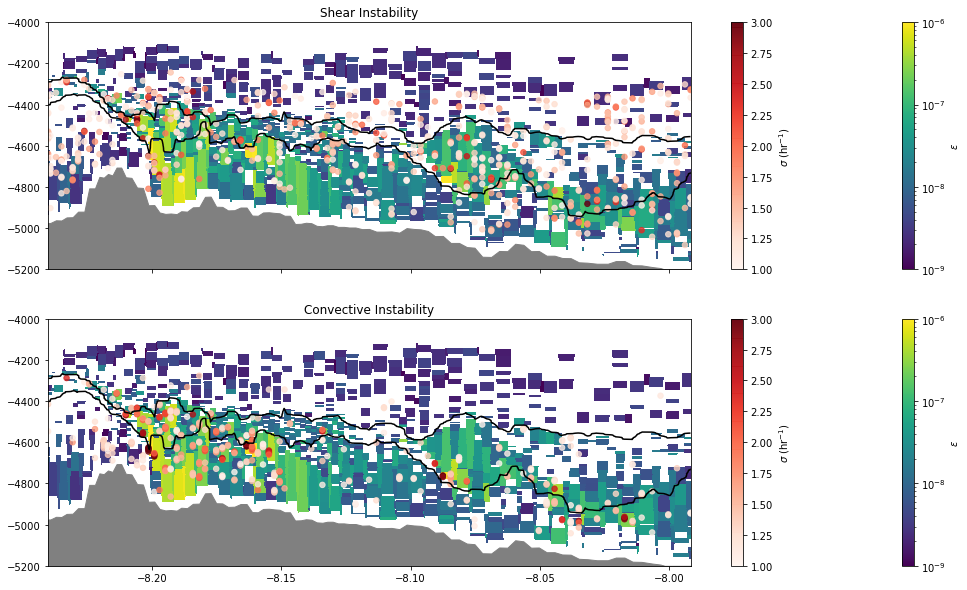

In [22]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), sharex=True)

# shear instability
ax[0].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
sc0 = ax[0].pcolor(data_2012['lat'], data_2012['z'],
                   data_2012['eps'], norm=LogNorm(vmin=1e-9, vmax=1e-6))
fig.colorbar(sc0, label="$\epsilon$", ax=ax[0])
ax[0].set_ylim([-5200, -4000])
ax[0].set_yticks(np.arange(-5200, -4000+1e-4, 200))
ax[0].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.93], colors='k', label='$\sigma_4=45.93 kgm^{-3}$')
ax[0].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.96], colors='k', label='$\sigma_4=45.93 kgm^{-3}$')
sc01 = ax[0].scatter(data_FGM[(mask_FGM_good & mask_FGM_shear)].lat, data_FGM[(mask_FGM_good & mask_FGM_shear)].cl,
                     c=data_FGM[(mask_FGM_good & mask_FGM_shear)].gr, vmax=3, vmin=1, marker='o', s=30, cmap=cm.Reds, alpha=.8)
fig.colorbar(sc01, label="$\sigma$ (hr$^{-1}$)", ax=ax[0])
ax[0].set_title('Shear Instability')

# convective instability
ax[1].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
sc1 = ax[1].pcolor(data_2012['lat'], data_2012['z'],
                   data_2012['eps'], norm=LogNorm(vmin=1e-9, vmax=1e-6))
fig.colorbar(sc1, label="$\epsilon$", ax=ax[1])
ax[1].set_ylim([-5200, -4000])
ax[1].set_yticks(np.arange(-5200, -4000+1e-4, 200))
ax[1].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.93], colors='k', label='$\sigma_4=45.93 kgm^{-3}$')
ax[1].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.96], colors='k', label='$\sigma_4=45.93 kgm^{-3}$')
sc11 = ax[1].scatter(data_FGM[(mask_FGM_good & mask_FGM_convec)].lat, data_FGM[(mask_FGM_good & mask_FGM_convec)].cl,
                     c=data_FGM[(mask_FGM_good & mask_FGM_convec)].gr, vmax=3, vmin=1, marker='o', s=30, cmap=cm.Reds, alpha=.8)
fig.colorbar(sc11, label="$\sigma$ (hr$^{-1}$)", ax=ax[1])
ax[1].set_title('Convective Instability')

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  del sys.path[0]
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'label'
  from ipykernel import kernelapp as app
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: The following kwargs were not used by contour: 'label'
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'label'


Text(0.5, 1.0, 'Convective Instability')

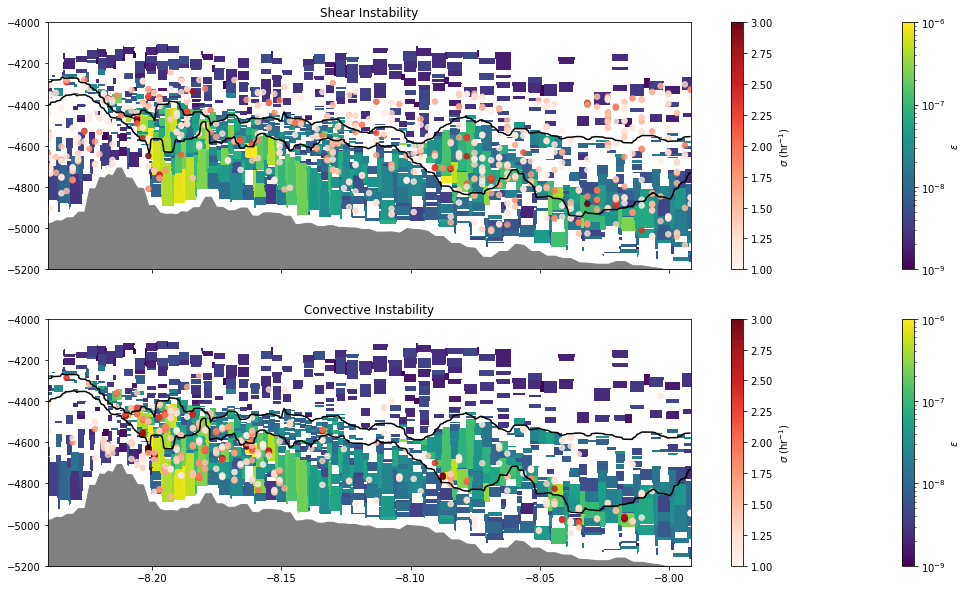

In [23]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), sharex=True)

# shear instability
ax[0].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
sc0 = ax[0].pcolor(data_2012['lat'], data_2012['z'],
                   data_2012['eps'], norm=LogNorm(vmin=1e-9, vmax=1e-6))
fig.colorbar(sc0, label="$\epsilon$", ax=ax[0])
ax[0].set_ylim([-5200, -4000])
ax[0].set_yticks(np.arange(-5200, -4000+1e-4, 200))
ax[0].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.93], colors='k', label='$\sigma_4=45.93 kgm^{-3}$')
ax[0].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.96], colors='k', label='$\sigma_4=45.93 kgm^{-3}$')
sc01 = ax[0].scatter(data_FGM[(mask_FGM_good & mask_FGM_shear_m)].lat, data_FGM[(mask_FGM_good & mask_FGM_shear_m)].cl,
                     c=data_FGM[(mask_FGM_good & mask_FGM_shear_m)].gr, vmax=3, vmin=1, marker='o', s=30, cmap=cm.Reds, alpha=.8)
fig.colorbar(sc01, label="$\sigma$ (hr$^{-1}$)", ax=ax[0])
ax[0].set_title('Shear Instability')

# convective instability
ax[1].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
sc1 = ax[1].pcolor(data_2012['lat'], data_2012['z'],
                   data_2012['eps'], norm=LogNorm(vmin=1e-9, vmax=1e-6))
fig.colorbar(sc1, label="$\epsilon$", ax=ax[1])
ax[1].set_ylim([-5200, -4000])
ax[1].set_yticks(np.arange(-5200, -4000+1e-4, 200))
ax[1].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.93], colors='k', label='$\sigma_4=45.93 kgm^{-3}$')
ax[1].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.96], colors='k', label='$\sigma_4=45.93 kgm^{-3}$')
sc11 = ax[1].scatter(data_FGM[(mask_FGM_good & mask_FGM_convec_m)].lat, data_FGM[(mask_FGM_good & mask_FGM_convec_m)].cl,
                     c=data_FGM[(mask_FGM_good & mask_FGM_convec_m)].gr, vmax=3, vmin=1, marker='o', s=30, cmap=cm.Reds, alpha=.8)
fig.colorbar(sc11, label="$\sigma$ (hr$^{-1}$)", ax=ax[1])
ax[1].set_title('Convective Instability')

c) Unstable modes and background N2 and shear

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  if __name__ == '__main__':
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  # This is added back by InteractiveShellApp.init_path()
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'label'
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'label'


[Text(0, 0, '5200'),
 Text(0, 0, '5000'),
 Text(0, 0, '4800'),
 Text(0, 0, '4600'),
 Text(0, 0, '4400'),
 Text(0, 0, '4200'),
 Text(0, 0, '4000')]

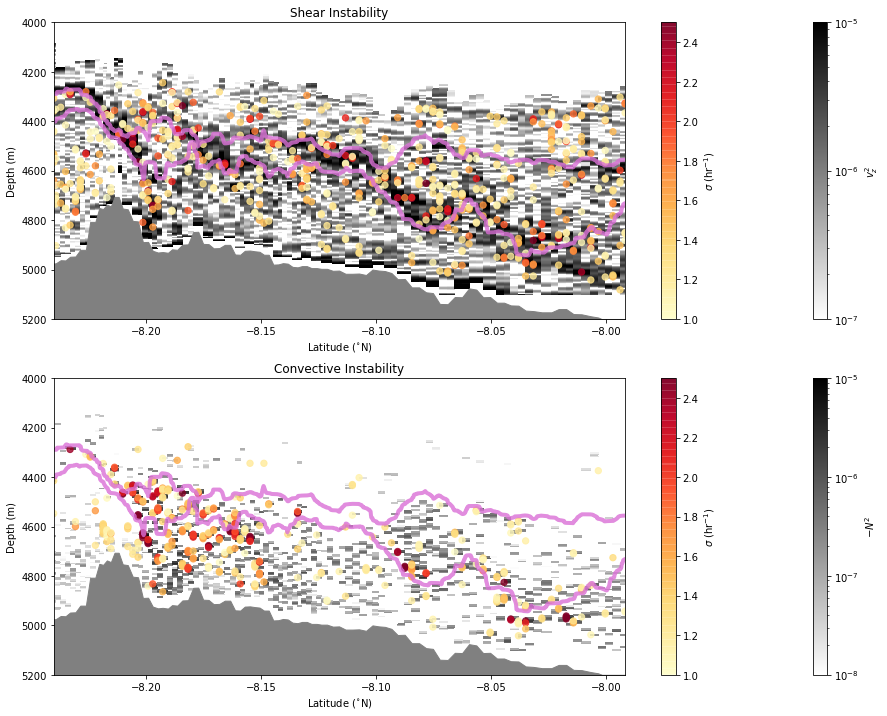

In [24]:
# for shear instability
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
sc00 = ax[0].pcolor(GM_towyo_2012['LAT'], GM_towyo_2012['zw'],
                    GM_towyo_2012['Vzm']**2, cmap=cm.gray_r, norm=LogNorm(vmin=1e-7, vmax=1e-5))
fig.colorbar(sc00, label="$v_z^2$", ax=ax[0])
ax[0].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
ax[0].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.93], colors='orchid', linewidths = 4, label='$\sigma_4=45.93 kgm^{-3}$', alpha=.8)
ax[0].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.96], colors='orchid', linewidths = 4, label='$\sigma_4=45.93 kgm^{-3}$', alpha=.8)
sc01 = ax[0].scatter(data_FGM[(mask_FGM_good & mask_FGM_shear)].lat, data_FGM[(mask_FGM_good & mask_FGM_shear)].cl,
                     c=data_FGM[(mask_FGM_good & mask_FGM_shear)].gr, vmax=2.5, vmin=1, marker='o', s=40, cmap=cm.YlOrRd, alpha=.8)
fig.colorbar(sc01, label="$\sigma$ (hr$^{-1}$)", ax=ax[0])
ax[0].set_xlabel('Latitude ($^{\circ}$N)')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('Shear Instability')
ax[0].set_ylim([-5200, -4000])
ax[0].set_yticks(np.arange(-5200, -4000+1e-4, 200))
ax[0].set_yticklabels(np.arange(5200, 4000-1e-4, -200, dtype=int))


sc10 = ax[1].pcolor(GM_towyo_2012['LAT'], GM_towyo_2012['zw'],
                    -GM_towyo_2012['N2m'], cmap=cm.gray_r, norm=LogNorm(vmin=1e-8, vmax=1e-5))
fig.colorbar(sc10, label="$-N^2$", ax=ax[1])
ax[1].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
ax[1].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.93], colors='orchid', linewidths = 4, label='$\sigma_4=45.93 kgm^{-3}$', alpha=.8)
ax[1].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.96], colors='orchid', linewidths = 4, label='$\sigma_4=45.93 kgm^{-3}$', alpha=.8)
sc11 = ax[1].scatter(data_FGM[(mask_FGM_good & mask_FGM_convec)].lat, data_FGM[(mask_FGM_good & mask_FGM_convec)].cl,
                     c=data_FGM[(mask_FGM_good & mask_FGM_convec)].gr, vmax=2.5, vmin=1, marker='o', s=40, cmap=cm.YlOrRd, alpha=.8)
fig.colorbar(sc11, label="$\sigma$ (hr$^{-1}$)", ax=ax[1])
ax[1].set_xlabel('Latitude ($^{\circ}$N)')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('Convective Instability')
ax[1].set_ylim([-5200, -4000])
ax[1].set_yticks(np.arange(-5200, -4000+1e-4, 200))
ax[1].set_yticklabels(np.arange(5200, 4000-1e-4, -200, dtype=int))

# plt.savefig(mdirec+ 'results/' + 'growthrate_alongP5.png', dpi=400)

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  if __name__ == '__main__':
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  # This is added back by InteractiveShellApp.init_path()
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'label'
/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'label'


[Text(0, 0, '5200'),
 Text(0, 0, '5000'),
 Text(0, 0, '4800'),
 Text(0, 0, '4600'),
 Text(0, 0, '4400'),
 Text(0, 0, '4200'),
 Text(0, 0, '4000')]

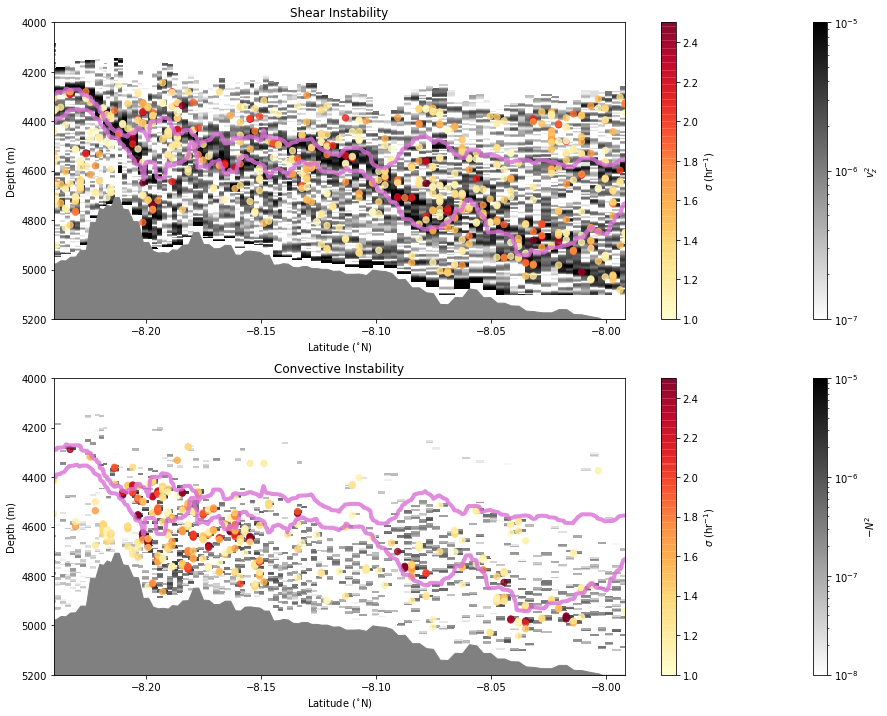

In [25]:
# for shear instability
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
sc00 = ax[0].pcolor(GM_towyo_2012['LAT'], GM_towyo_2012['zw'],
                    GM_towyo_2012['Vzm']**2, cmap=cm.gray_r, norm=LogNorm(vmin=1e-7, vmax=1e-5))
fig.colorbar(sc00, label="$v_z^2$", ax=ax[0])
ax[0].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
ax[0].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.93], colors='orchid', linewidths = 4, label='$\sigma_4=45.93 kgm^{-3}$', alpha=.8)
ax[0].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.96], colors='orchid', linewidths = 4, label='$\sigma_4=45.93 kgm^{-3}$', alpha=.8)
sc01 = ax[0].scatter(data_FGM[(mask_FGM_good & mask_FGM_shear_m)].lat, data_FGM[(mask_FGM_good & mask_FGM_shear_m)].cl,
                     c=data_FGM[(mask_FGM_good & mask_FGM_shear_m)].gr, vmax=2.5, vmin=1, marker='o', s=40, cmap=cm.YlOrRd, alpha=.8)
fig.colorbar(sc01, label="$\sigma$ (hr$^{-1}$)", ax=ax[0])
ax[0].set_xlabel('Latitude ($^{\circ}$N)')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('Shear Instability')
ax[0].set_ylim([-5200, -4000])
ax[0].set_yticks(np.arange(-5200, -4000+1e-4, 200))
ax[0].set_yticklabels(np.arange(5200, 4000-1e-4, -200, dtype=int))


sc10 = ax[1].pcolor(GM_towyo_2012['LAT'], GM_towyo_2012['zw'],
                    -GM_towyo_2012['N2m'], cmap=cm.gray_r, norm=LogNorm(vmin=1e-8, vmax=1e-5))
fig.colorbar(sc10, label="$-N^2$", ax=ax[1])
ax[1].fill_between(data_2012['mlat'], -data_2012['bdepth'],
                   np.ones(data_2012['bdepth'].size)*-5200, color='0.5')
ax[1].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.93], colors='orchid', linewidths = 4, label='$\sigma_4=45.93 kgm^{-3}$', alpha=.8)
ax[1].contour(data_2012['lat'], data_2012['z'], data_2012['sig4_sorted'], [
              1045.96], colors='orchid', linewidths = 4, label='$\sigma_4=45.93 kgm^{-3}$', alpha=.8)
sc11 = ax[1].scatter(data_FGM[(mask_FGM_good & mask_FGM_convec_m)].lat, data_FGM[(mask_FGM_good & mask_FGM_convec_m)].cl,
                     c=data_FGM[(mask_FGM_good & mask_FGM_convec_m)].gr, vmax=2.5, vmin=1, marker='o', s=40, cmap=cm.YlOrRd, alpha=.8)
fig.colorbar(sc11, label="$\sigma$ (hr$^{-1}$)", ax=ax[1])
ax[1].set_xlabel('Latitude ($^{\circ}$N)')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('Convective Instability')
ax[1].set_ylim([-5200, -4000])
ax[1].set_yticks(np.arange(-5200, -4000+1e-4, 200))
ax[1].set_yticklabels(np.arange(5200, 4000-1e-4, -200, dtype=int))

# plt.savefig(mdirec+ 'results/' + 'growthrate_alongP5.png', dpi=400)

## 4). Statistics

- all modes

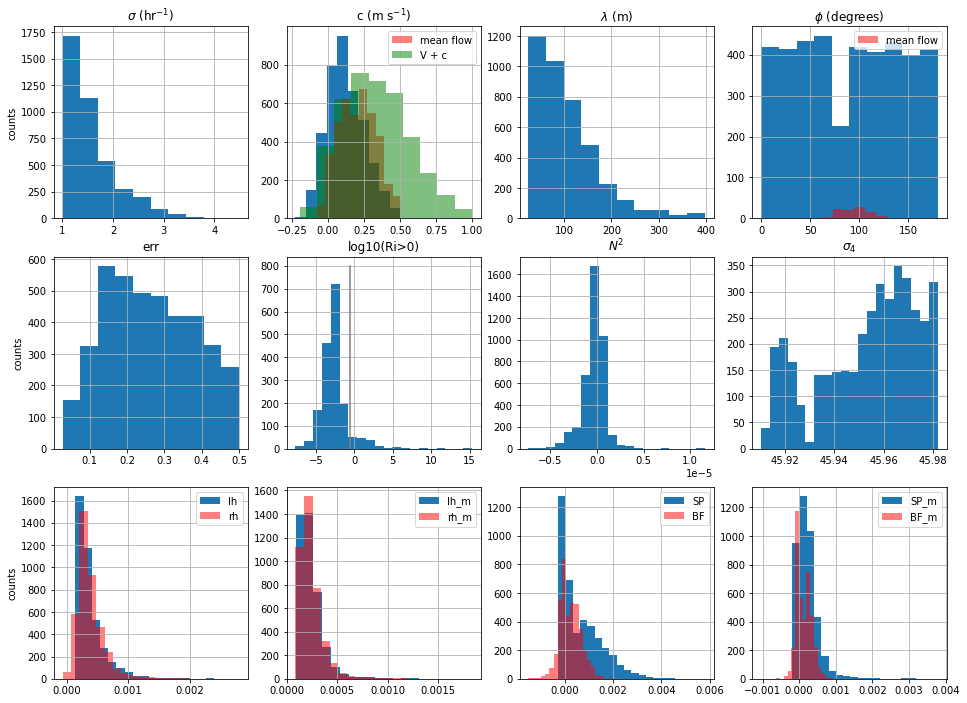

In [26]:
# for all
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].gr.hist(ax=ax[0, 0])
ax[0, 0].set_title('$\sigma$ (hr$^{-1}$)')
ax[0, 0].set_ylabel('counts')
data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].cr.hist(ax=ax[0, 1])
data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].cl_v.hist(ax=ax[0, 1], label='mean flow', facecolor='r', alpha=0.5)
(data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].cr + data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].cl_v).hist(ax=ax[0, 1], label='V + c', facecolor='g', alpha=0.5)
ax[0, 1].legend()
ax[0, 1].set_title('c (m s$^{-1}$)')
data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].lam.hist(ax=ax[0, 2])
ax[0, 2].set_title('$\lambda$ (m)')
data[~(data.lat == GM_towyo_2012['LAT'][15])
     & mask_good].phi.hist(ax=ax[0, -1])
phim = np.copy(GM_towyo_2012['Phim'])
phim[phim < 0] += 180
ax[0, -1].hist(phim, facecolor='r', alpha=0.5, label='mean flow')
ax[0, -1].legend()
ax[0, -1].set_title('$\phi$ (degrees)')

data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].err.hist(ax=ax[1, 0])
ax[1, 0].set_title('err')
ax[1, 0].set_ylabel('counts')
np.log(data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].ri[data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].ri>0]).hist(ax=ax[1, 1], bins=20)
ax[1, 1].plot([np.log10(1/4),np.log10(1/4)],[0,800],c='.5')
ax[1, 1].set_title('log10(Ri>0)')
data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].n2.hist(ax=ax[1, 2], bins=20)
ax[1, 2].set_title('$N^2$')
(data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].cl_sig4-1000).hist(ax=ax[1, -1], bins=20)
ax[1, -1].set_title('$\sigma_4$')


data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].lh.hist(
    ax=ax[-1, 0], label='lh', bins=20)
data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].rh.hist(
    ax=ax[-1, 0], alpha=0.5, facecolor='r', label='rh', bins=20)
ax[-1, 0].legend()
ax[-1, 0].set_ylabel('counts')
data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].lhm.hist(
    ax=ax[-1, 1], label='lh_m', bins=20)
data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].rhm.hist(
    ax=ax[-1, 1], alpha=0.5, facecolor='r', label='rh_m', bins=20)
ax[-1, 1].legend()
data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].sp.hist(
    ax=ax[-1, 2], label='SP', bins=20)
data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].bf.hist(
    ax=ax[-1, 2], alpha=0.5, facecolor='r', label='BF', bins=20)
ax[-1, 2].legend()
data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].spm.hist(
    ax=ax[-1, -1], label='SP_m', bins=20)
data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].bfm.hist(
    ax=ax[-1, -1], alpha=0.5, facecolor='r', label='BF_m', bins=20)
ax[-1, -1].legend()


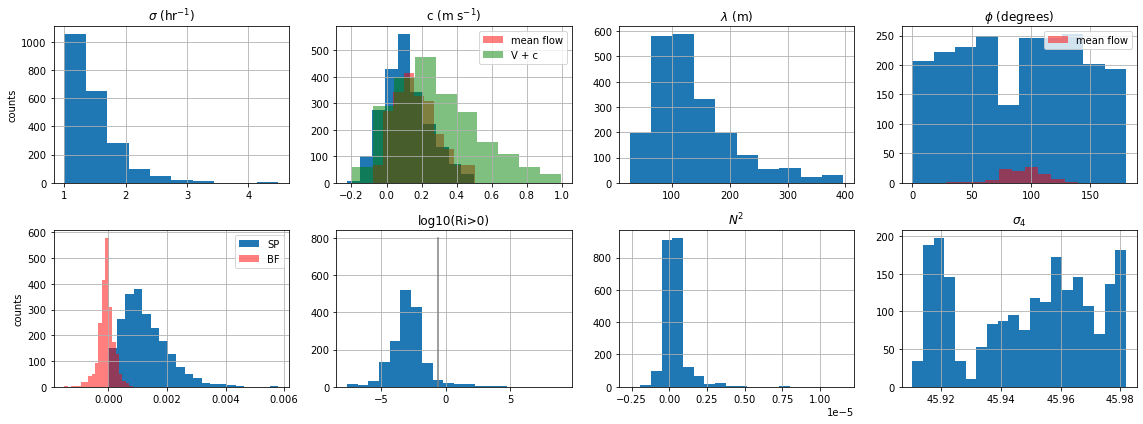

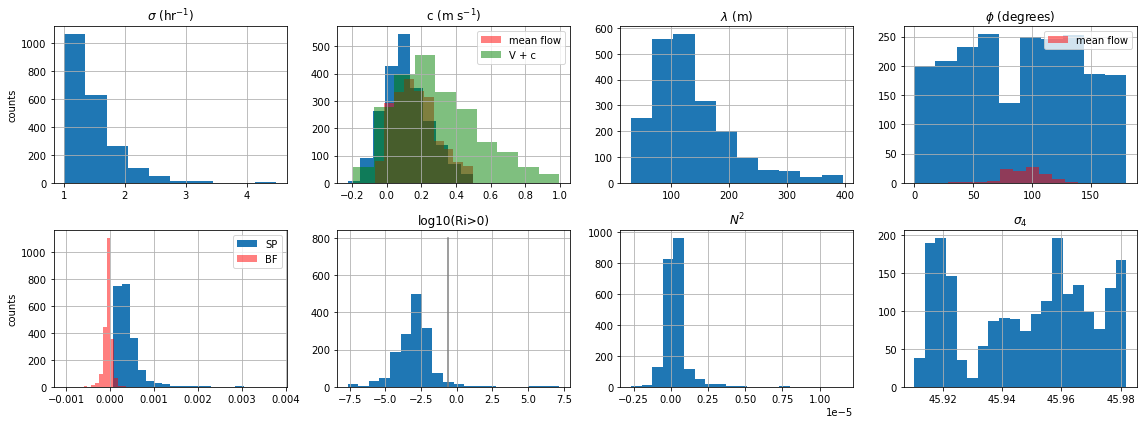

In [27]:
# for shear instability
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].gr.hist(ax=ax[0, 0])
ax[0, 0].set_title('$\sigma$ (hr$^{-1}$)')
ax[0, 0].set_ylabel('counts')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].cr.hist(ax=ax[0, 1])
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].cl_v.hist(ax=ax[0, 1], label='mean flow', facecolor='r', alpha=0.5)
(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].cr + data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].cl_v).hist(ax=ax[0, 1], label='V + c', facecolor='g', alpha=0.5)
ax[0, 1].legend()
ax[0, 1].set_title('c (m s$^{-1}$)')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].lam.hist(ax=ax[0, 2])
ax[0, 2].set_title('$\lambda$ (m)')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].phi.hist(ax=ax[0, -1])
phim = np.copy(GM_towyo_2012['Phim'])
phim[phim < 0] += 180
ax[0, -1].hist(phim, facecolor='r', alpha=0.5, label='mean flow')
ax[0, -1].legend()
ax[0, -1].set_title('$\phi$ (degrees)')


data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].sp.hist(ax=ax[1, 0], label='SP', bins=20)
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].bf.hist(ax=ax[1, 0], alpha=0.5, facecolor='r', label='BF', bins=20)
ax[1, 0].legend()
ax[1, 0].set_ylabel('counts')
np.log(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].ri[data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].ri>0]).hist(ax=ax[1, 1], bins=20)
ax[1, 1].plot([np.log10(1/4),np.log10(1/4)],[0,800],c='.5')
ax[1, 1].set_title('log10(Ri>0)')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].n2.hist(ax=ax[1, 2], bins=20)
ax[1, 2].set_title('$N^2$')
(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].cl_sig4-1000).hist(ax=ax[1, -1], bins=20)
ax[1, -1].set_title('$\sigma_4$')

plt.tight_layout()

# for shear instability
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m)].gr.hist(ax=ax[0, 0])
ax[0, 0].set_title('$\sigma$ (hr$^{-1}$)')
ax[0, 0].set_ylabel('counts')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m)].cr.hist(ax=ax[0, 1])
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m)].cl_v.hist(ax=ax[0, 1], label='mean flow', facecolor='r', alpha=0.5)
(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m)].cr + data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m)].cl_v).hist(ax=ax[0, 1], label='V + c', facecolor='g', alpha=0.5)
ax[0, 1].legend()
ax[0, 1].set_title('c (m s$^{-1}$)')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m)].lam.hist(ax=ax[0, 2])
ax[0, 2].set_title('$\lambda$ (m)')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m)].phi.hist(ax=ax[0, -1])
phim = np.copy(GM_towyo_2012['Phim'])
phim[phim < 0] += 180
ax[0, -1].hist(phim, facecolor='r', alpha=0.5, label='mean flow')
ax[0, -1].legend()
ax[0, -1].set_title('$\phi$ (degrees)')


data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m)].spm.hist(ax=ax[1, 0], label='SP', bins=20)
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m)].bfm.hist(ax=ax[1, 0], alpha=0.5, facecolor='r', label='BF', bins=20)
ax[1, 0].legend()
ax[1, 0].set_ylabel('counts')
np.log(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m)].ri[data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m)].ri>0]).hist(ax=ax[1, 1], bins=20)
ax[1, 1].plot([np.log10(1/4),np.log10(1/4)],[0,800],c='.5')
ax[1, 1].set_title('log10(Ri>0)')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m)].n2.hist(ax=ax[1, 2], bins=20)
ax[1, 2].set_title('$N^2$')
(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m)].cl_sig4-1000).hist(ax=ax[1, -1], bins=20)
ax[1, -1].set_title('$\sigma_4$')

plt.tight_layout()

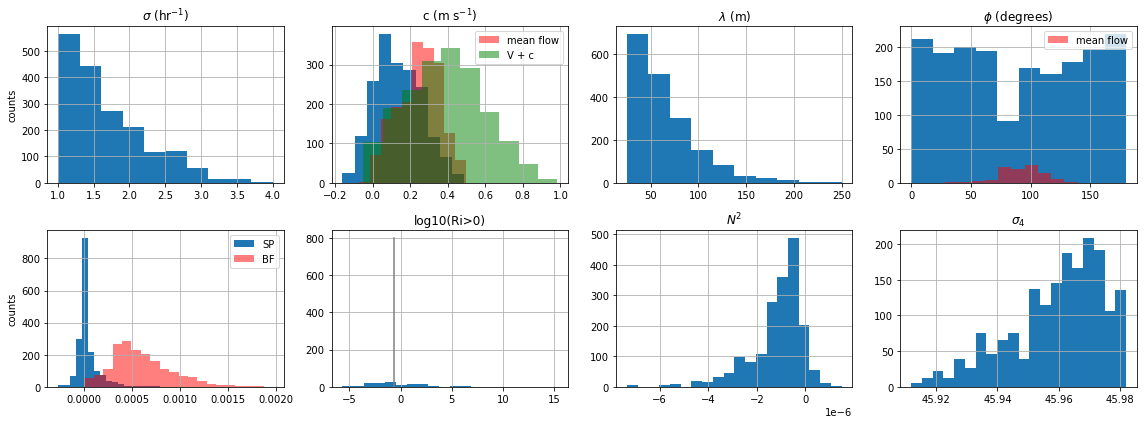

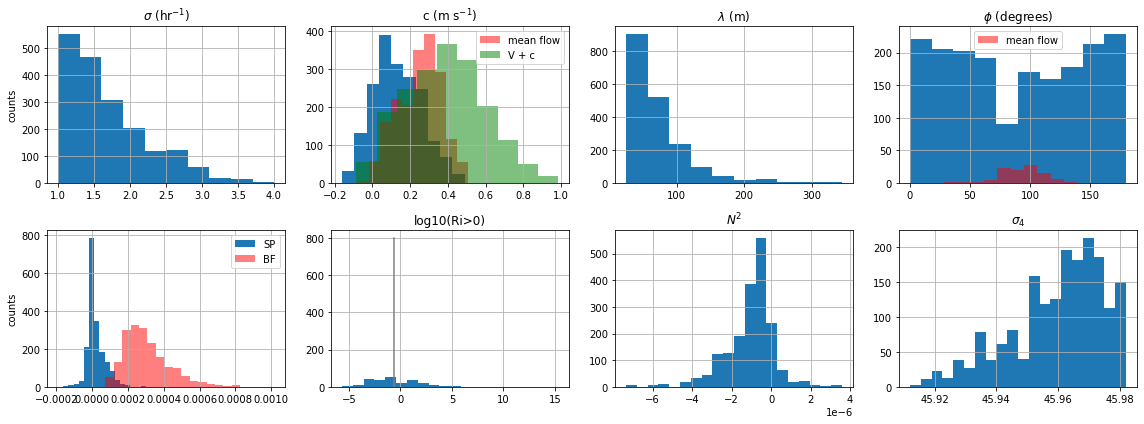

In [28]:
# for convective instability
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].gr.hist(ax=ax[0, 0])
ax[0, 0].set_title('$\sigma$ (hr$^{-1}$)')
ax[0, 0].set_ylabel('counts')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].cr.hist(ax=ax[0, 1])
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].cl_v.hist(ax=ax[0, 1], label='mean flow', facecolor='r', alpha=0.5)
(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].cr + data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].cl_v).hist(ax=ax[0, 1], label='V + c', facecolor='g', alpha=0.5)
ax[0, 1].legend()
ax[0, 1].set_title('c (m s$^{-1}$)')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].lam.hist(ax=ax[0, 2])
ax[0, 2].set_title('$\lambda$ (m)')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].phi.hist(ax=ax[0, -1])
phim = np.copy(GM_towyo_2012['Phim'])
phim[phim < 0] += 180
ax[0, -1].hist(phim, facecolor='r', alpha=0.5, label='mean flow')
ax[0, -1].legend()
ax[0, -1].set_title('$\phi$ (degrees)')


data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].sp.hist(ax=ax[1, 0], label='SP', bins=20)
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].bf.hist(ax=ax[1, 0], alpha=0.5, facecolor='r', label='BF', bins=20)
ax[1, 0].legend()
ax[1, 0].set_ylabel('counts')
np.log(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].ri[data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].ri>0]).hist(ax=ax[1, 1], bins=20)
ax[1, 1].plot([np.log10(1/4),np.log10(1/4)],[0,800],c='.5')
ax[1, 1].set_title('log10(Ri>0)')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].n2.hist(ax=ax[1, 2], bins=20)
ax[1, 2].set_title('$N^2$')
(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].cl_sig4-1000).hist(ax=ax[1, -1], bins=20)
ax[1, -1].set_title('$\sigma_4$')

plt.tight_layout()

# for convective instability
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m)].gr.hist(ax=ax[0, 0])
ax[0, 0].set_title('$\sigma$ (hr$^{-1}$)')
ax[0, 0].set_ylabel('counts')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m)].cr.hist(ax=ax[0, 1])
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m)].cl_v.hist(ax=ax[0, 1], label='mean flow', facecolor='r', alpha=0.5)
(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m)].cr + data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m)].cl_v).hist(ax=ax[0, 1], label='V + c', facecolor='g', alpha=0.5)
ax[0, 1].legend()
ax[0, 1].set_title('c (m s$^{-1}$)')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m)].lam.hist(ax=ax[0, 2])
ax[0, 2].set_title('$\lambda$ (m)')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m)].phi.hist(ax=ax[0, -1])
phim = np.copy(GM_towyo_2012['Phim'])
phim[phim < 0] += 180
ax[0, -1].hist(phim, facecolor='r', alpha=0.5, label='mean flow')
ax[0, -1].legend()
ax[0, -1].set_title('$\phi$ (degrees)')


data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m)].spm.hist(ax=ax[1, 0], label='SP', bins=20)
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m)].bfm.hist(ax=ax[1, 0], alpha=0.5, facecolor='r', label='BF', bins=20)
ax[1, 0].legend()
ax[1, 0].set_ylabel('counts')
np.log(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m)].ri[data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m)].ri>0]).hist(ax=ax[1, 1], bins=20)
ax[1, 1].plot([np.log10(1/4),np.log10(1/4)],[0,800],c='.5')
ax[1, 1].set_title('log10(Ri>0)')
data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m)].n2.hist(ax=ax[1, 2], bins=20)
ax[1, 2].set_title('$N^2$')
(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m)].cl_sig4-1000).hist(ax=ax[1, -1], bins=20)
ax[1, -1].set_title('$\sigma_4$')

plt.tight_layout()

Text(0, 0.5, 'counts')

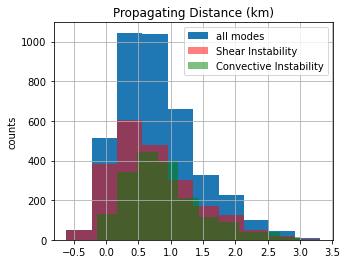

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
((1/data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].gr)*(data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].cr + data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].cl_v)*3600/1000).hist(ax=ax, label='all modes')
((1/data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].gr)*(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].cr + data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear)].cl_v)*3600/1000).hist(ax=ax, label='Shear Instability', alpha=0.5, facecolor='r')
((1/data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].gr)*(data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].cr + data[(~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec)].cl_v)*3600/1000).hist(ax=ax, label='Convective Instability', alpha=0.5, facecolor='g')
ax.legend()
ax.set_title('Propagating Distance (km)')
ax.set_ylabel('counts')


In [30]:
print('Number of all modes:', str(
    len(data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good].gr)))
print('Number of all SI modes:', str(len(data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear].gr)), '~', str(
    len(data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_shear_m].gr)))
print('Number of all CI modes:', str(len(data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec].gr)), '~', str(
    len(data[~(data.lat == GM_towyo_2012['LAT'][15]) & mask_good & mask_convec_m].gr)))

Number of all modes: 4011
Number of all SI modes: 2180 ~ 2151
Number of all CI modes: 1815 ~ 1860


- fastest growing modes

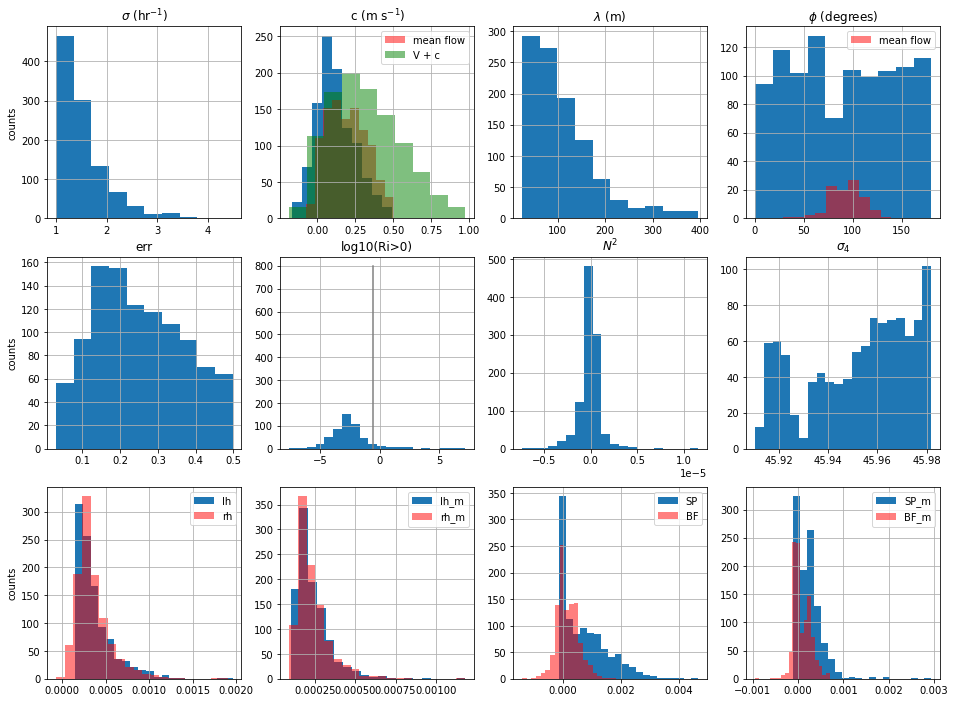

In [31]:
# for all
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].gr.hist(ax=ax[0, 0])
ax[0, 0].set_title('$\sigma$ (hr$^{-1}$)')
ax[0, 0].set_ylabel('counts')
data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].cr.hist(ax=ax[0, 1])
data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].cl_v.hist(ax=ax[0, 1], label='mean flow', facecolor='r', alpha=0.5)
(data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].cr + data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].cl_v).hist(ax=ax[0, 1], label='V + c', facecolor='g', alpha=0.5)
ax[0, 1].legend()
ax[0, 1].set_title('c (m s$^{-1}$)')
data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].lam.hist(ax=ax[0, 2])
ax[0, 2].set_title('$\lambda$ (m)')
data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15])
     & mask_FGM_good].phi.hist(ax=ax[0, -1])
phim = np.copy(GM_towyo_2012['Phim'])
phim[phim < 0] += 180
ax[0, -1].hist(phim, facecolor='r', alpha=0.5, label='mean flow')
ax[0, -1].legend()
ax[0, -1].set_title('$\phi$ (degrees)')

data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].err.hist(ax=ax[1, 0])
ax[1, 0].set_title('err')
ax[1, 0].set_ylabel('counts')
np.log(data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].ri[data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].ri>0]).hist(ax=ax[1, 1], bins=20)
ax[1, 1].plot([np.log10(1/4),np.log10(1/4)],[0,800],c='.5')
ax[1, 1].set_title('log10(Ri>0)')
data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].n2.hist(ax=ax[1, 2], bins=20)
ax[1, 2].set_title('$N^2$')
(data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].cl_sig4-1000).hist(ax=ax[1, -1], bins=20)
ax[1, -1].set_title('$\sigma_4$')


data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].lh.hist(
    ax=ax[-1, 0], label='lh', bins=20)
data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].rh.hist(
    ax=ax[-1, 0], alpha=0.5, facecolor='r', label='rh', bins=20)
ax[-1, 0].legend()
ax[-1, 0].set_ylabel('counts')
data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].lhm.hist(
    ax=ax[-1, 1], label='lh_m', bins=20)
data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].rhm.hist(
    ax=ax[-1, 1], alpha=0.5, facecolor='r', label='rh_m', bins=20)
ax[-1, 1].legend()
data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].sp.hist(
    ax=ax[-1, 2], label='SP', bins=20)
data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].bf.hist(
    ax=ax[-1, 2], alpha=0.5, facecolor='r', label='BF', bins=20)
ax[-1, 2].legend()
data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].spm.hist(
    ax=ax[-1, -1], label='SP_m', bins=20)
data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].bfm.hist(
    ax=ax[-1, -1], alpha=0.5, facecolor='r', label='BF_m', bins=20)
ax[-1, -1].legend()


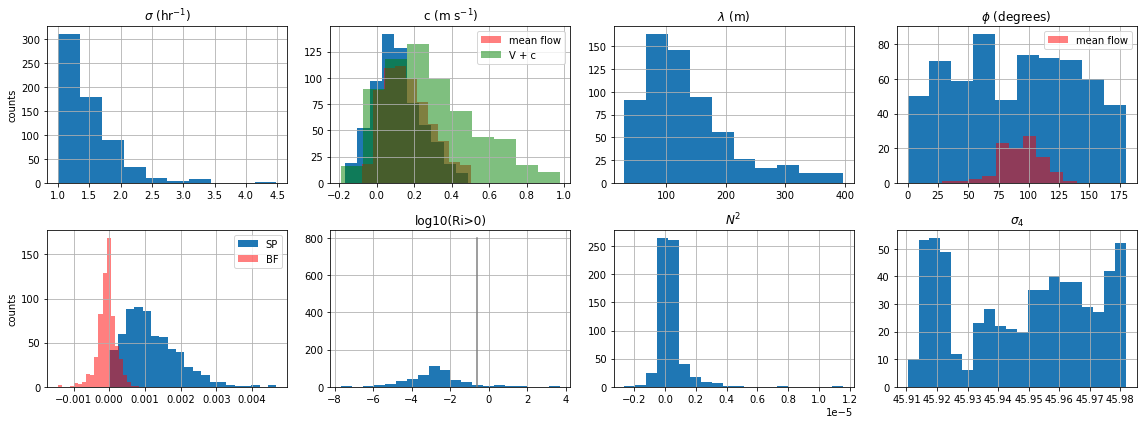

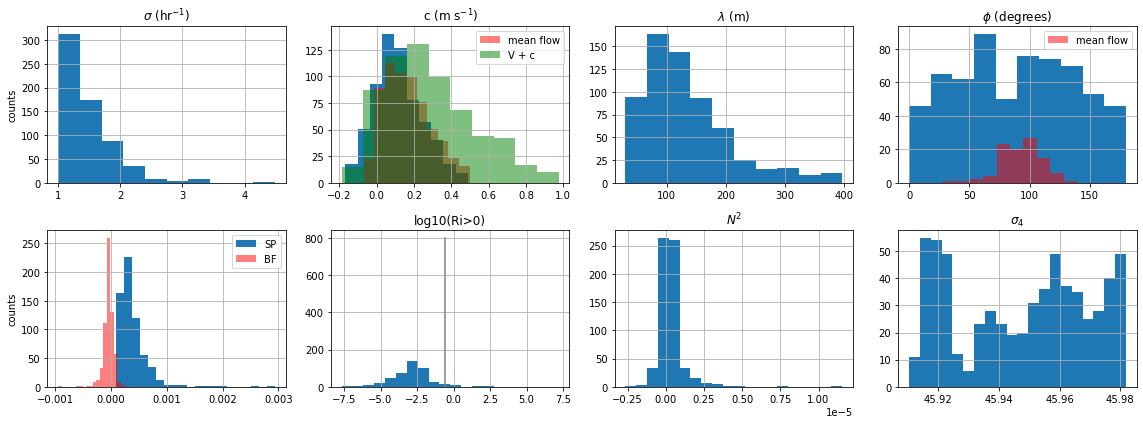

In [32]:
# for shear instability
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].gr.hist(ax=ax[0, 0])
ax[0, 0].set_title('$\sigma$ (hr$^{-1}$)')
ax[0, 0].set_ylabel('counts')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].cr.hist(ax=ax[0, 1])
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].cl_v.hist(ax=ax[0, 1], label='mean flow', facecolor='r', alpha=0.5)
(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].cr + data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].cl_v).hist(ax=ax[0, 1], label='V + c', facecolor='g', alpha=0.5)
ax[0, 1].legend()
ax[0, 1].set_title('c (m s$^{-1}$)')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].lam.hist(ax=ax[0, 2])
ax[0, 2].set_title('$\lambda$ (m)')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].phi.hist(ax=ax[0, -1])
phim = np.copy(GM_towyo_2012['Phim'])
phim[phim < 0] += 180
ax[0, -1].hist(phim, facecolor='r', alpha=0.5, label='mean flow')
ax[0, -1].legend()
ax[0, -1].set_title('$\phi$ (degrees)')


data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].sp.hist(ax=ax[1, 0], label='SP', bins=20)
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].bf.hist(ax=ax[1, 0], alpha=0.5, facecolor='r', label='BF', bins=20)
ax[1, 0].legend()
ax[1, 0].set_ylabel('counts')
np.log(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].ri[data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].ri>0]).hist(ax=ax[1, 1], bins=20)
ax[1, 1].plot([np.log10(1/4),np.log10(1/4)],[0,800],c='.5')
ax[1, 1].set_title('log10(Ri>0)')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].n2.hist(ax=ax[1, 2], bins=20)
ax[1, 2].set_title('$N^2$')
(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].cl_sig4-1000).hist(ax=ax[1, -1], bins=20)
ax[1, -1].set_title('$\sigma_4$')

plt.tight_layout()

# for shear instability
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m)].gr.hist(ax=ax[0, 0])
ax[0, 0].set_title('$\sigma$ (hr$^{-1}$)')
ax[0, 0].set_ylabel('counts')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m)].cr.hist(ax=ax[0, 1])
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m)].cl_v.hist(ax=ax[0, 1], label='mean flow', facecolor='r', alpha=0.5)
(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m)].cr + data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m)].cl_v).hist(ax=ax[0, 1], label='V + c', facecolor='g', alpha=0.5)
ax[0, 1].legend()
ax[0, 1].set_title('c (m s$^{-1}$)')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m)].lam.hist(ax=ax[0, 2])
ax[0, 2].set_title('$\lambda$ (m)')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m)].phi.hist(ax=ax[0, -1])
phim = np.copy(GM_towyo_2012['Phim'])
phim[phim < 0] += 180
ax[0, -1].hist(phim, facecolor='r', alpha=0.5, label='mean flow')
ax[0, -1].legend()
ax[0, -1].set_title('$\phi$ (degrees)')


data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m)].spm.hist(ax=ax[1, 0], label='SP', bins=20)
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m)].bfm.hist(ax=ax[1, 0], alpha=0.5, facecolor='r', label='BF', bins=20)
ax[1, 0].legend()
ax[1, 0].set_ylabel('counts')
np.log(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m)].ri[data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m)].ri>0]).hist(ax=ax[1, 1], bins=20)
ax[1, 1].plot([np.log10(1/4),np.log10(1/4)],[0,800],c='.5')
ax[1, 1].set_title('log10(Ri>0)')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m)].n2.hist(ax=ax[1, 2], bins=20)
ax[1, 2].set_title('$N^2$')
(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m)].cl_sig4-1000).hist(ax=ax[1, -1], bins=20)
ax[1, -1].set_title('$\sigma_4$')

plt.tight_layout()

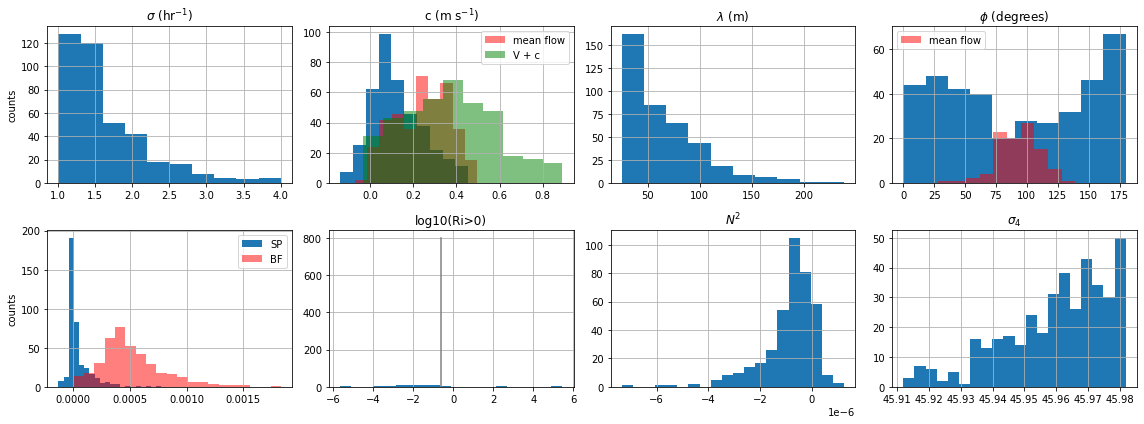

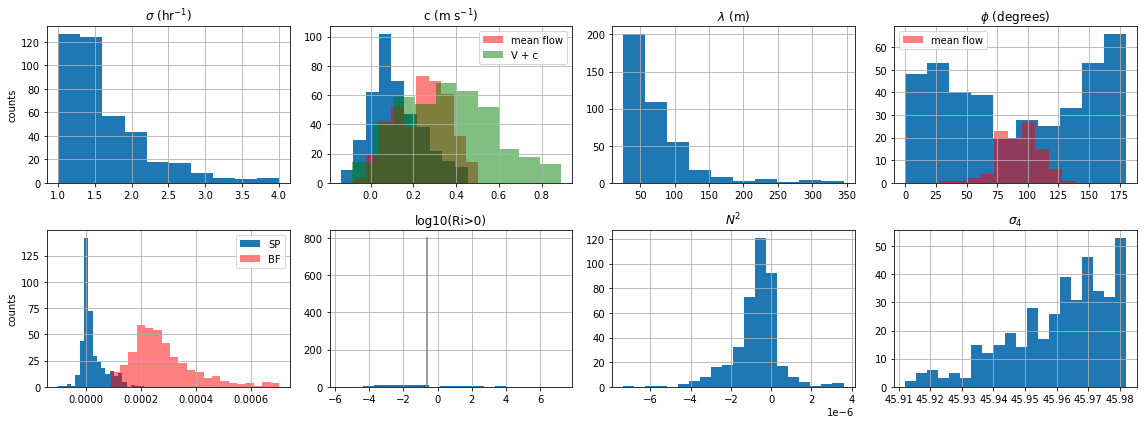

In [33]:
# for convective instability
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].gr.hist(ax=ax[0, 0])
ax[0, 0].set_title('$\sigma$ (hr$^{-1}$)')
ax[0, 0].set_ylabel('counts')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].cr.hist(ax=ax[0, 1])
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].cl_v.hist(ax=ax[0, 1], label='mean flow', facecolor='r', alpha=0.5)
(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].cr + data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].cl_v).hist(ax=ax[0, 1], label='V + c', facecolor='g', alpha=0.5)
ax[0, 1].legend()
ax[0, 1].set_title('c (m s$^{-1}$)')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].lam.hist(ax=ax[0, 2])
ax[0, 2].set_title('$\lambda$ (m)')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].phi.hist(ax=ax[0, -1])
phim = np.copy(GM_towyo_2012['Phim'])
phim[phim < 0] += 180
ax[0, -1].hist(phim, facecolor='r', alpha=0.5, label='mean flow')
ax[0, -1].legend()
ax[0, -1].set_title('$\phi$ (degrees)')


data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].sp.hist(ax=ax[1, 0], label='SP', bins=20)
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].bf.hist(ax=ax[1, 0], alpha=0.5, facecolor='r', label='BF', bins=20)
ax[1, 0].legend()
ax[1, 0].set_ylabel('counts')
np.log(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].ri[data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].ri>0]).hist(ax=ax[1, 1], bins=20)
ax[1, 1].plot([np.log10(1/4),np.log10(1/4)],[0,800],c='.5')
ax[1, 1].set_title('log10(Ri>0)')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].n2.hist(ax=ax[1, 2], bins=20)
ax[1, 2].set_title('$N^2$')
(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].cl_sig4-1000).hist(ax=ax[1, -1], bins=20)
ax[1, -1].set_title('$\sigma_4$')

plt.tight_layout()

# for convective instability
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m)].gr.hist(ax=ax[0, 0])
ax[0, 0].set_title('$\sigma$ (hr$^{-1}$)')
ax[0, 0].set_ylabel('counts')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m)].cr.hist(ax=ax[0, 1])
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m)].cl_v.hist(ax=ax[0, 1], label='mean flow', facecolor='r', alpha=0.5)
(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m)].cr + data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m)].cl_v).hist(ax=ax[0, 1], label='V + c', facecolor='g', alpha=0.5)
ax[0, 1].legend()
ax[0, 1].set_title('c (m s$^{-1}$)')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m)].lam.hist(ax=ax[0, 2])
ax[0, 2].set_title('$\lambda$ (m)')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m)].phi.hist(ax=ax[0, -1])
phim = np.copy(GM_towyo_2012['Phim'])
phim[phim < 0] += 180
ax[0, -1].hist(phim, facecolor='r', alpha=0.5, label='mean flow')
ax[0, -1].legend()
ax[0, -1].set_title('$\phi$ (degrees)')


data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m)].spm.hist(ax=ax[1, 0], label='SP', bins=20)
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m)].bfm.hist(ax=ax[1, 0], alpha=0.5, facecolor='r', label='BF', bins=20)
ax[1, 0].legend()
ax[1, 0].set_ylabel('counts')
np.log(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m)].ri[data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m)].ri>0]).hist(ax=ax[1, 1], bins=20)
ax[1, 1].plot([np.log10(1/4),np.log10(1/4)],[0,800],c='.5')
ax[1, 1].set_title('log10(Ri>0)')
data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m)].n2.hist(ax=ax[1, 2], bins=20)
ax[1, 2].set_title('$N^2$')
(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m)].cl_sig4-1000).hist(ax=ax[1, -1], bins=20)
ax[1, -1].set_title('$\sigma_4$')

plt.tight_layout()

Text(0, 0.5, 'counts')

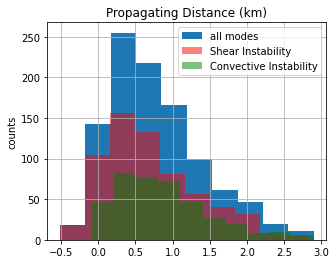

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
((1/data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].gr)*(data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].cr + data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].cl_v)*3600/1000).hist(ax=ax, label='all modes')
((1/data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].gr)*(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].cr + data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear)].cl_v)*3600/1000).hist(ax=ax, label='Shear Instability', alpha=0.5, facecolor='r')
((1/data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].gr)*(data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].cr + data_FGM[(~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec)].cl_v)*3600/1000).hist(ax=ax, label='Convective Instability', alpha=0.5, facecolor='g')
ax.legend()
ax.set_title('Propagating Distance (km)')
ax.set_ylabel('counts')


In [35]:
print('Number of the fastest growing modes:', str(
    len(data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good].gr)))
print('Number of the fastest growing SI modes:', str(len(data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear].gr)), '~', str(
    len(data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_shear_m].gr)))
print('Number of the fastest growing CI modes:', str(len(data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec].gr)), '~', str(
    len(data_FGM[~(data_FGM.lat == GM_towyo_2012['LAT'][15]) & mask_FGM_good & mask_FGM_convec_m].gr)))

Number of the fastest growing modes: 1036
Number of the fastest growing SI modes: 635 ~ 631
Number of the fastest growing CI modes: 394 ~ 405
